In [1]:
%matplotlib notebook

In [2]:
#The following loads the bulk of the hard core code that runs the simulations
#before running this you must install the delta_psi_py package:
#see https://github.com/protonzilla/Delta_Psi_Py for information on downloading
#Davis, GA, Rutherford, AW, and Kramer, DM. (2017) 
#Hacking the thylakoid proton motive force for improved photosynthesis: 
#modulating ion flux rates that control proton motive force partitioning into Δψ and ΔpH. 
#Philosophical transactions of the Royal Society of London Series B, Biological sciences 372. 

from delta_psi_py import *

In [3]:
#Using the standard conditions, set up in the main library, the initial_sim_states is a 
#class that contains the standard initial values. To insert these values into the simulations,
#it is necessary to convert to a list, using the method .as_list(), as in the following:
# initial_sim_states.as_list() 

initial_sim_states=sim_states()
initial_sim_state_list=initial_sim_states.as_list()

Kx_initial=sim_constants()
Kx_initial.k_KEA=0
Kx_initial.fraction_pH_effect=.25
#perform an initial simulation to allow the system to reach equilibrium in the dark


original_dark_equilibrated_initial_y, output=dark_equibration(initial_sim_states.as_list(), 
                                                              Kx_initial, 60*60, return_kinetics=True)
#All_Constants_Table('Standard Constants', Kx_initial)

FloatProgress(value=0.0, max=1.0)

In [4]:
#All_Constants_Table('Standard Initial States', initial_sim_states)

In [5]:
#generate a dictionary to hold the results of the simulations.

output_dict={}
constants_dict={}
starting_conditions_dict={}

In [6]:
#import pandas as pd to manipulate dataframes
import pandas as pd

#generate a dictionary of c-subunit stoichiometries and associated colors
set_of_c_stoichiometries = {8:'tab:blue',11:'tab:red',12:'tab:green',13:'tab:orange',
                            14:'black',15:'tab:cyan',17:'tab:purple'}


In [7]:
#generate a dictionary of light intensities and associated linestyles
flat_light_intensities = {20:'-',100:'--',1000:':'}

In [8]:
#generate a 10 minute light pulse for each of the 3 intensities in the flat_light_intensities dictionary

for intensity in flat_light_intensities:
    baseline_duration=150 #in seconds
    baseline_intensity=0 #dark baseline intensity
    pulse_duration=600 #600 seconds (10 minute) pulse
    pulse_intensity=intensity #pulse is X intensity units
    recovery_duration = 500 #500 seconds recovery
    recovery_intensity=0 #recovery is dark
    rise_time=1 #1000 ms for the light to rise
    time_units='seconds' 
    point_frequency=100 #start with a frequency of 100 points per subtrace
    repeat_cycles=1 #do this once
    wave=generate_square_wave_based_light_sequence (baseline_duration, baseline_intensity,
                        pulse_duration, pulse_intensity, recovery_duration, recovery_intensity, 
                        rise_time, time_units, point_frequency, repeat_cycles)
    light_pattern['single_square_10_min_pulse_'+str(intensity)+'_max']=wave

In [9]:
#run simulations for each of the flat_light_intensities
#all standard conditions remain unchanged
#vary n (H+/ATP) based on each c-subunit stoichiometry in set_of_c_stoichiometries dictionary

for intensity in flat_light_intensities:
    print(intensity)
    for c_stoichiometry in set_of_c_stoichiometries:
        n = c_stoichiometry/3
        
        #the output dictionary name
        on='single 10 min '+str(intensity)+' light pulse c subunits='+str(c_stoichiometry) 
        print('n='+str(n))
        print(on)
        Kx=sim_constants() #generrate arrays contining optimized time segments for the simulation
        Kx.k_KEA=0
        Kx.fraction_pH_effect=.25
        
        Kx.n=n
        constants_dict[on]=Kx #store constants in constants_dict

        output_dict[on], starting_conditions_dict[on]=sim(Kx, original_dark_equilibrated_initial_y, 
                                                light_pattern['single_square_10_min_pulse_'+str(intensity)+'_max'],
                                                max_light_change, points_per_segment, dark_equilibration=60*60)

        Changed_Constants_Table('Change Constants', Kx_initial, Kx)

20
n=2.6666666666666665
single 10 min 20 light pulse c subunits=8


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=33.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['light_per_L', 0.0, 0.6060606060606055],
 ['n', 4.666666666666667, 2.6666666666666665]]

n=3.6666666666666665
single 10 min 20 light pulse c subunits=11


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=33.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['light_per_L', 0.0, 0.6060606060606055],
 ['n', 4.666666666666667, 3.6666666666666665]]

n=4.0
single 10 min 20 light pulse c subunits=12


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=33.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['light_per_L', 0.0, 0.6060606060606055],
 ['n', 4.666666666666667, 4.0]]

n=4.333333333333333
single 10 min 20 light pulse c subunits=13


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=33.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['light_per_L', 0.0, 0.6060606060606055],
 ['n', 4.666666666666667, 4.333333333333333]]

n=4.666666666666667
single 10 min 20 light pulse c subunits=14


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=33.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['light_per_L', 0.0, 0.6060606060606055]]

n=5.0
single 10 min 20 light pulse c subunits=15


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=33.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['light_per_L', 0.0, 0.6060606060606055],
 ['n', 4.666666666666667, 5.0]]

n=5.666666666666667
single 10 min 20 light pulse c subunits=17


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=33.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['light_per_L', 0.0, 0.6060606060606055],
 ['n', 4.666666666666667, 5.666666666666667]]

100
n=2.6666666666666665
single 10 min 100 light pulse c subunits=8


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 2.6666666666666665]]

n=3.6666666666666665
single 10 min 100 light pulse c subunits=11


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 3.6666666666666665]]

n=4.0
single 10 min 100 light pulse c subunits=12


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 4.0]]

n=4.333333333333333
single 10 min 100 light pulse c subunits=13


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 4.333333333333333]]

n=4.666666666666667
single 10 min 100 light pulse c subunits=14


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value']]

n=5.0
single 10 min 100 light pulse c subunits=15


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 5.0]]

n=5.666666666666667
single 10 min 100 light pulse c subunits=17


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 5.666666666666667]]

1000
n=2.6666666666666665
single 10 min 1000 light pulse c subunits=8


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 2.6666666666666665]]

n=3.6666666666666665
single 10 min 1000 light pulse c subunits=11


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 3.6666666666666665]]

n=4.0
single 10 min 1000 light pulse c subunits=12


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 4.0]]

n=4.333333333333333
single 10 min 1000 light pulse c subunits=13


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 4.333333333333333]]

n=4.666666666666667
single 10 min 1000 light pulse c subunits=14


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value']]

n=5.0
single 10 min 1000 light pulse c subunits=15


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 5.0]]

n=5.666666666666667
single 10 min 1000 light pulse c subunits=17


FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 5.666666666666667]]

Figure 2: ATP synthase c–ring size impacts photosynthetic physiology in the dark


<IPython.core.display.Javascript object>


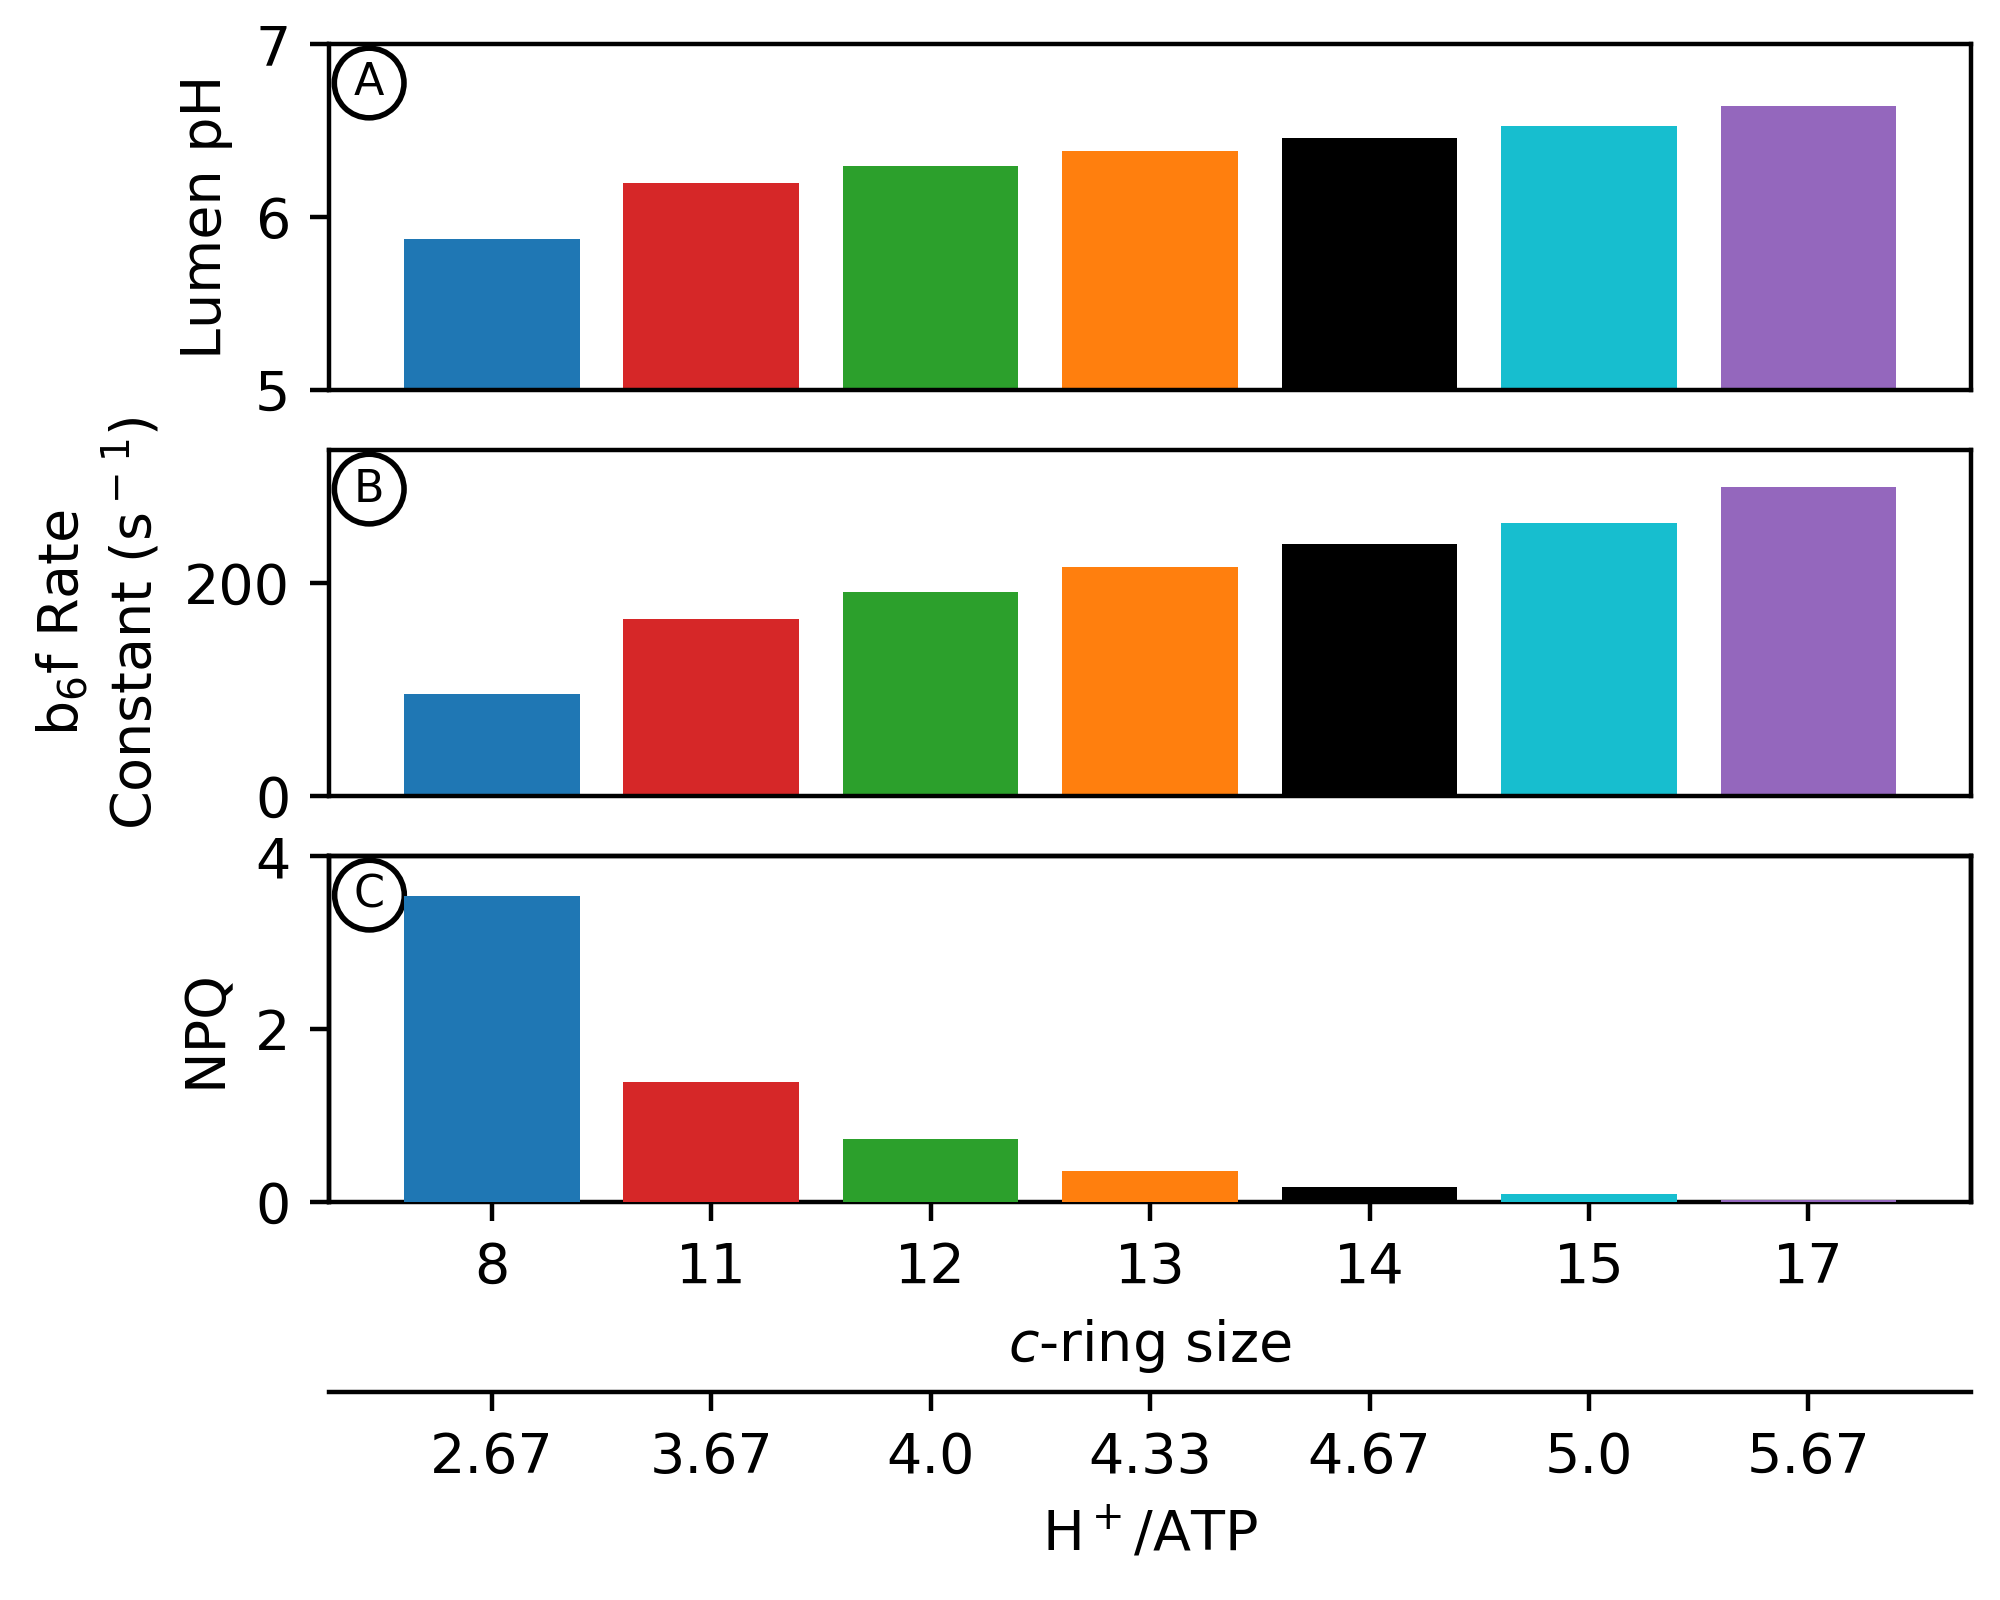

Kinetic modelling of photosynthetic light reactions with altered ATP synthase c subunit stoichiometry. Simulated responses of the light reactions were performed as in Davis et al., 2017, with all standard conditions held constant except for the number of ATP synthase c subunits. The pmf required to maintain equilibrium with ΔGATP in the dark is variable depending upon the number of c subunits in the ATP synthase c–ring (Eq. 2). Changes in lumen pH in the dark due to alterations in c–ring size (A) can decrease cytochrome b6f turnover rate (B) as well as activate pH–dependent NPQ in higher plants (C).


In [11]:
#generate a figure of lumen pH-mediated conditions at equilibrium with deltaG ATP
print('Figure 2: ATP synthase c–ring size impacts photosynthetic physiology in the dark')

fig = plt.figure('Figure 2', figsize=(5,4), dpi=200)
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax4 = ax3.twiny()

n = []
for key in output_dict:
    c=key.split('=')[1]
    if "single 10 min" in str(key):
        ax1.bar(c,output_dict[key]['pHlumen'][0], color=set_of_c_stoichiometries[int(c)])
        ax2.bar(c,output_dict[key]['b6f_control'][0],color=set_of_c_stoichiometries[int(c)])            
        ax3.bar(c,output_dict[key]['NPQ'][0],color=set_of_c_stoichiometries[int(c)])
        ax4.bar(c,output_dict[key]['NPQ'][0],color=set_of_c_stoichiometries[int(c)])
    values = round(int(c)/3,2)
    n.append(values)

ax1.set_ylabel('Lumen pH')
ax2.set_ylabel('b$_6$f Rate\nConstant (s$^-$$^1$)')
ax3.set_ylabel('NPQ')
ax3.set_xlabel(r'$c$-ring size')
ax1.get_xaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax1.set_ylim(bottom=5,top=7)
ax2.set_ylim(bottom=0,top=325)
ax3.set_ylim(bottom=0,top=4)


props = dict(boxstyle='circle', facecolor='white')
ax1.text(.015, .95, 'A', transform=ax1.transAxes, fontsize=8,verticalalignment='top', bbox=props)
ax2.text(.015, .95, 'B', transform=ax2.transAxes, fontsize=8,verticalalignment='top', bbox=props)
ax3.text(.015, .95, 'C', transform=ax3.transAxes, fontsize=8,verticalalignment='top', bbox=props)
ax4.set_xlabel('H$^+$/ATP')
ax4.xaxis.set_ticks_position("bottom")
ax4.xaxis.set_label_position("bottom")
ax4.spines["bottom"].set_position(("axes", -0.55))
labels = ['2.67','3.67','4.0','4.33','4.67','5.0','5.67']
ax4.set_xticklabels(labels)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=.0)
plt.show()
print('Kinetic modelling of photosynthetic light reactions with altered ATP synthase c subunit stoichiometry. '
      'Simulated responses of the light reactions were performed as in Davis et al., 2017, with all standard ' 
      'conditions held constant except for the number of ATP synthase c subunits. The pmf required to maintain '
      'equilibrium with ΔGATP in the dark is variable depending upon the number of c subunits in the ATP synthase ' 
      'c–ring (Eq. 2). Changes in lumen pH in the dark due to alterations in c–ring size (A) can decrease '
      'cytochrome b6f turnover rate (B) as well as activate pH–dependent NPQ in higher plants (C).')

Figure 3: Altered ATP synthase c-subunit stoichiometry limits pmf composition and pH–mediated regulatory processes during photosynthesis.


<IPython.core.display.Javascript object>


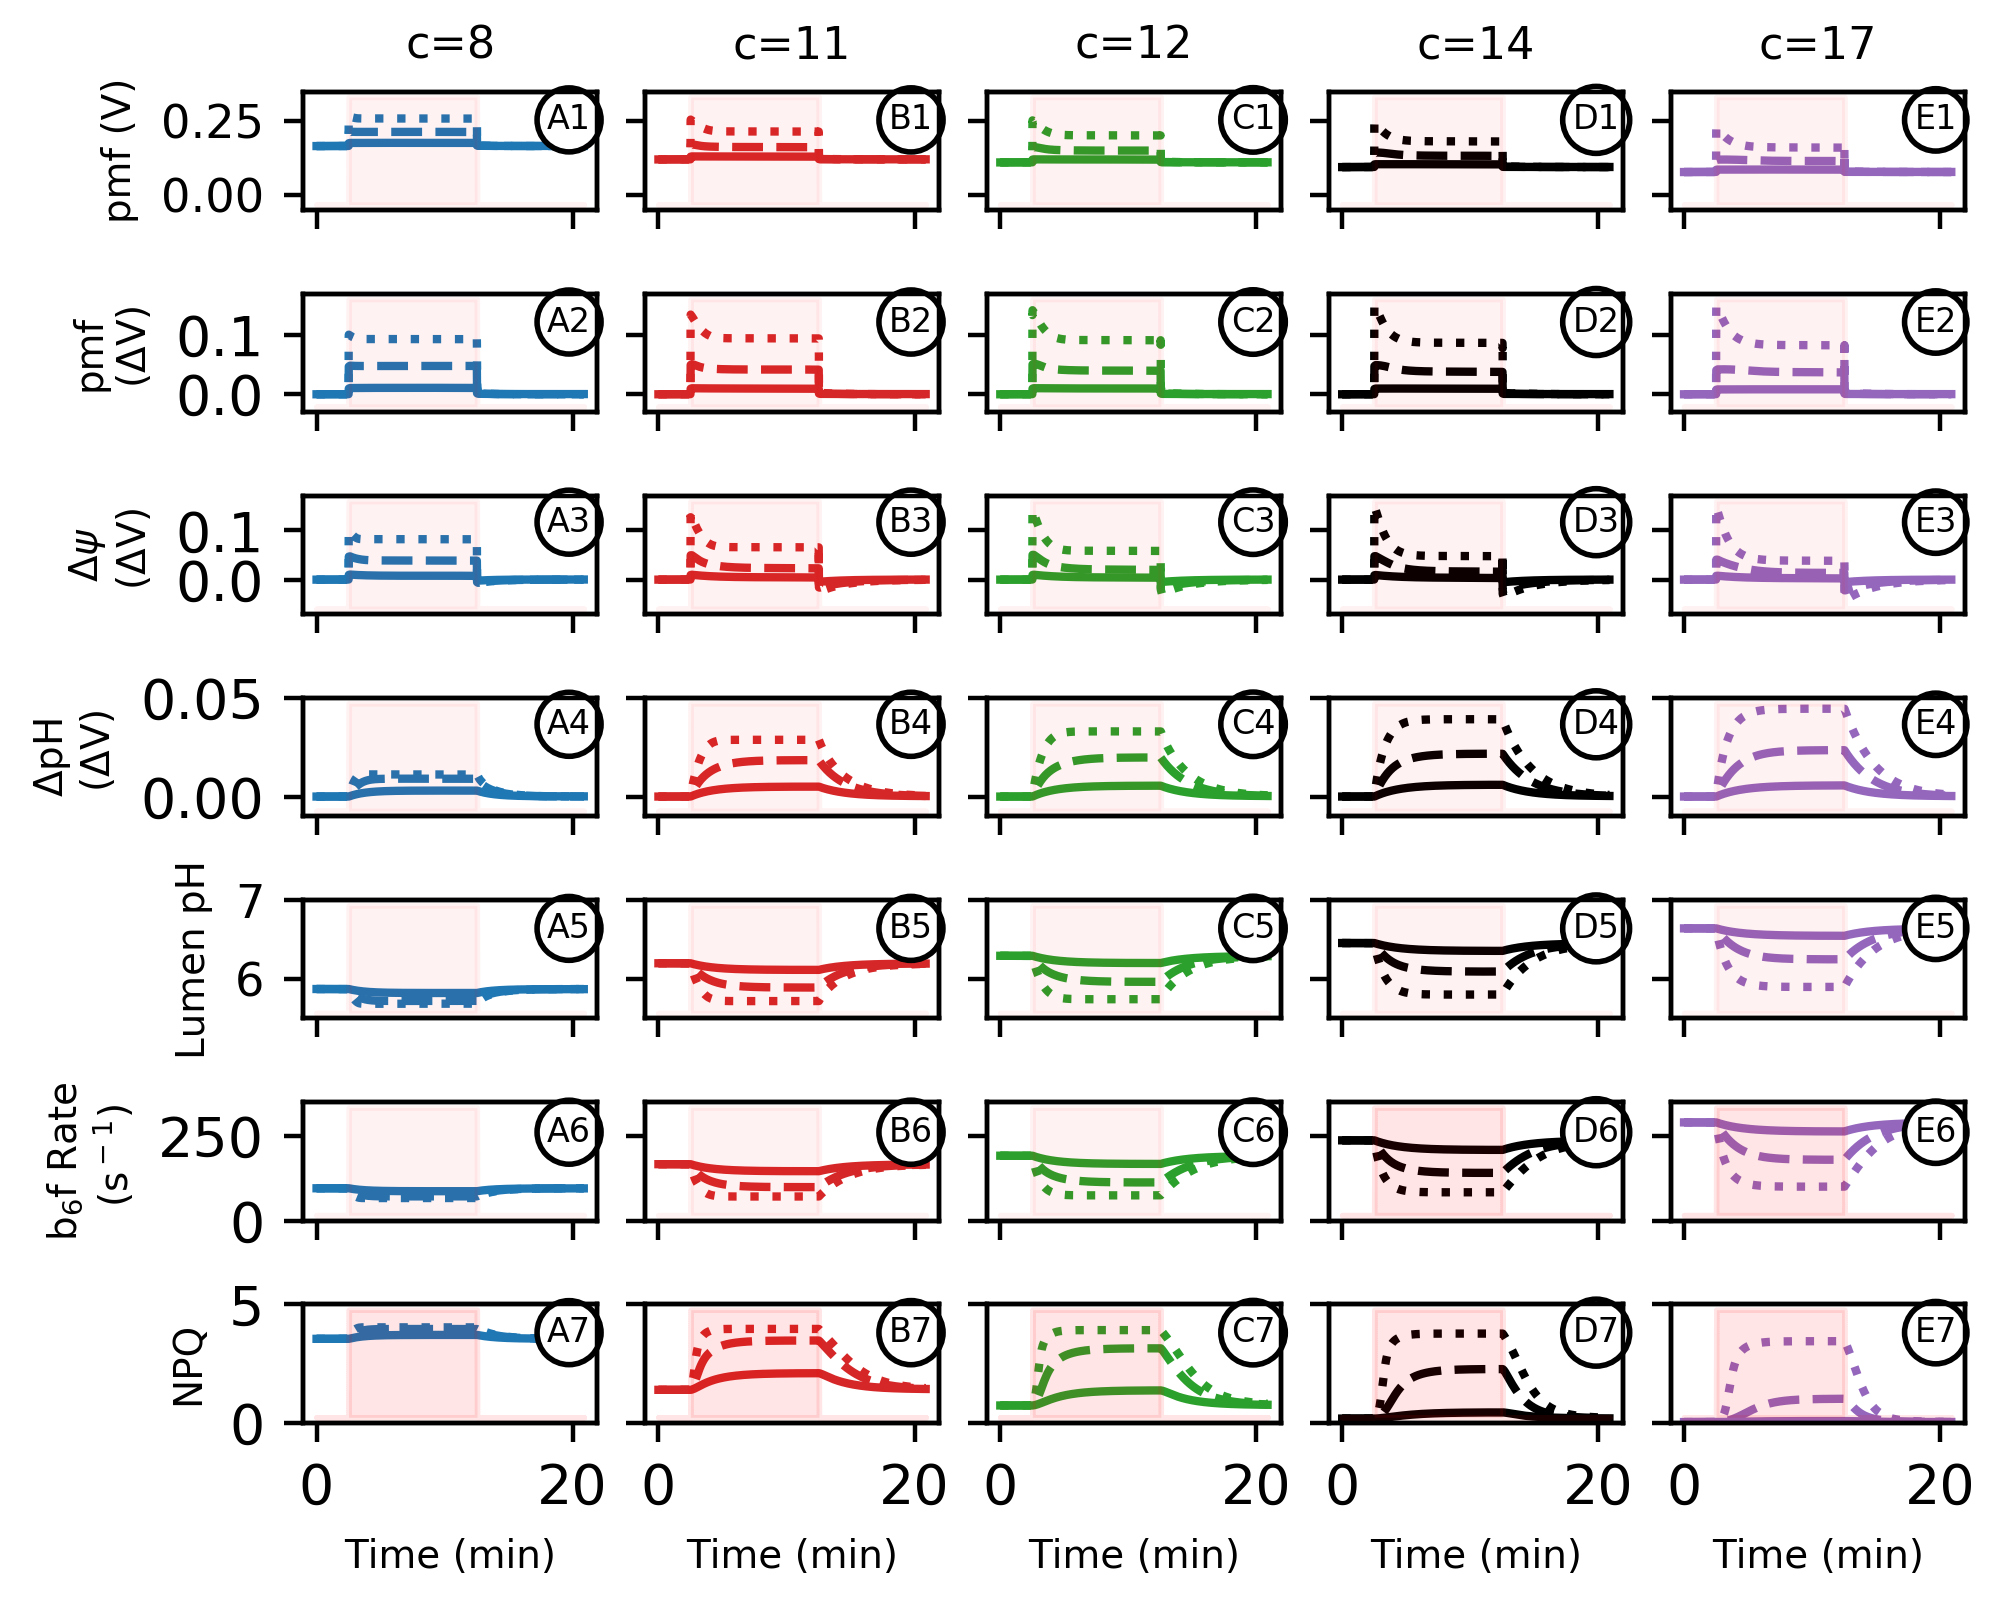

Simulated responses of the light reactions were performed as in Davis et al., 2017, with all standard conditions held constant except for the number of ATP synthase c-subunits. Simulations were performed using 10 minutes of static light at either 20 (solid lines), 100 (dashed lines), or 1000 (dotted lines) μmol photons m-2s-1. Intervals of light excitation are indicated by shaded regions. (Panels 1-4) The light–induced pmf (1, 2A-D) of ATP synthases with c–stoichiometries of 8 (blue, column A), 11 (red, column B), 12 (green, column C), 14 (black, column D), or 17 (purple, column E) are shown in units of volts, so that a ΔpH of one is equivalent to 0.06 V. The total pmf (panel 2), Δψ (panel 3), and ΔpH (panel 4) are shown as light–induced changes relative to the pmf dark values indicated as ΔV from dark values, to emphasize light–induced ATP synthase constraints. (5) Light–induced changes in lumen pH due to photosynthetic activity. Light intensities and c–ring composition as in (1). (6)

In [12]:
print('Figure 3: Altered ATP synthase c-subunit stoichiometry limits pmf composition and pH–mediated regulatory '
      'processes during photosynthesis.')
fig = plt.figure('Figure 3', figsize=(5,4), dpi=200)
ax1 = fig.add_subplot(7,5,1)
ax2 = fig.add_subplot(7,5,2)
ax3 = fig.add_subplot(7,5,3)
ax4 = fig.add_subplot(7,5,4)
ax5 = fig.add_subplot(7,5,5)
ax6 = fig.add_subplot(7,5,6)
ax7 = fig.add_subplot(7,5,7)
ax8 = fig.add_subplot(7,5,8)
ax9 = fig.add_subplot(7,5,9)
ax10 = fig.add_subplot(7,5,10)
ax11 = fig.add_subplot(7,5,11)
ax12 = fig.add_subplot(7,5,12)
ax13 = fig.add_subplot(7,5,13)
ax14 = fig.add_subplot(7,5,14)
ax15 = fig.add_subplot(7,5,15)
ax16 = fig.add_subplot(7,5,16)
ax17 = fig.add_subplot(7,5,17)
ax18 = fig.add_subplot(7,5,18)
ax19 = fig.add_subplot(7,5,19)
ax20 = fig.add_subplot(7,5,20)
ax21 = fig.add_subplot(7,5,21)
ax22 = fig.add_subplot(7,5,22)
ax23 = fig.add_subplot(7,5,23)
ax24 = fig.add_subplot(7,5,24)
ax25 = fig.add_subplot(7,5,25)
ax26 = fig.add_subplot(7,5,26)
ax27 = fig.add_subplot(7,5,27)
ax28 = fig.add_subplot(7,5,28)
ax29 = fig.add_subplot(7,5,29)
ax30 = fig.add_subplot(7,5,30)
ax31 = fig.add_subplot(7,5,31)
ax32 = fig.add_subplot(7,5,32)
ax33 = fig.add_subplot(7,5,33)
ax34 = fig.add_subplot(7,5,34)
ax35 = fig.add_subplot(7,5,35)


ax1b = ax1.twinx()
ax2b = ax2.twinx()
ax3b = ax3.twinx()
ax4b = ax4.twinx()
ax5b = ax5.twinx()
ax6b = ax6.twinx()
ax7b = ax7.twinx()
ax8b = ax8.twinx()
ax9b = ax9.twinx()
ax10b = ax10.twinx()
ax11b = ax11.twinx()
ax12b = ax12.twinx()
ax13b = ax13.twinx()
ax14b = ax14.twinx()
ax15b = ax15.twinx()
ax16b = ax16.twinx()
ax17b = ax17.twinx()
ax18b = ax18.twinx()
ax19b = ax19.twinx()
ax20b = ax20.twinx()
ax21b = ax21.twinx()
ax22b = ax22.twinx()
ax23b = ax23.twinx()
ax24b = ax24.twinx()
ax25b = ax25.twinx()
ax26b = ax26.twinx()
ax27b = ax27.twinx()
ax28b = ax28.twinx()
ax29b = ax29.twinx()
ax30b = ax30.twinx()
ax31b = ax31.twinx()
ax32b = ax32.twinx()
ax33b = ax33.twinx()
ax34b = ax34.twinx()
ax35b = ax35.twinx()
        
axes_row1 = [ax1,ax2,ax3,ax4,ax5]
axes_row2 = [ax6,ax7,ax8,ax9,ax10]
axes_row3 = [ax11,ax12,ax13,ax14,ax15]
axes_row4 = [ax16,ax17,ax18,ax19,ax20]
axes_row5 = [ax21,ax22,ax23,ax24,ax25]
axes_row6 = [ax26,ax27,ax28,ax29,ax30]
axes_row7 = [ax31,ax32,ax33,ax34,ax35]
c_stoichiometry = ['8','11','12','14','17']


for key in output_dict:
    if "single 10 min" in str(key):
        light=key.split('single 10 min ')[1]
        light=light.split(' light')[0]
            
        for i in range(len(axes_row1)):
            subplot_row1 = axes_row1[i]
            subplot_row2 = axes_row2[i]
            subplot_row3 = axes_row3[i]
            subplot_row4 = axes_row4[i]
            subplot_row5 = axes_row5[i]
            subplot_row6 = axes_row6[i]
            subplot_row7 = axes_row7[i]
            c = c_stoichiometry[i]
            if c == key.split('=')[1]:                                   
                subplot_row1.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                        color=set_of_c_stoichiometries[int(c)],linestyle=flat_light_intensities[int(light)])
                subplot_row2.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                        color=set_of_c_stoichiometries[int(c)],linestyle=flat_light_intensities[int(light)])
                subplot_row3.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                        color=set_of_c_stoichiometries[int(c)],linestyle=flat_light_intensities[int(light)])
                subplot_row4.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                        color=set_of_c_stoichiometries[int(c)],linestyle=flat_light_intensities[int(light)])
                subplot_row5.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                        color=set_of_c_stoichiometries[int(c)],linestyle=flat_light_intensities[int(light)])
                subplot_row6.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                        color=set_of_c_stoichiometries[int(c)],linestyle=flat_light_intensities[int(light)])
                subplot_row7.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                        color=set_of_c_stoichiometries[int(c)],linestyle=flat_light_intensities[int(light)])

axes = [ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,ax8b,ax9b,ax10b,ax11b,ax12b,ax13b,ax14b,ax15b,ax16b,ax17b,ax18b,
        ax19b,ax20b,ax21b,ax22b,ax23b,ax24b,ax25b,ax26b,ax27b,ax28b,ax29b,ax30b,ax31b,ax32b,ax33b,ax34b,ax35b]

for key in output_dict:
    for i in range(len(axes)):
        subplot=axes[i]
        if "single 10 min" in str(key):
            c=key.split('=')[1]
            light=key.split('single 10 min ')[1]
            light=light.split(' light')[0]        
            if light == '1000' and c == '8':
                subplot.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                                     color='red', alpha=0.05,zorder=2)

ax1.set_ylabel('pmf (V)',fontsize=7)
ax6.set_ylabel('pmf\n ($\Delta$V)',fontsize=7)
ax11.set_ylabel('$\Delta$$\psi$\n ($\Delta$V)',fontsize=7)
ax16.set_ylabel('$\Delta$pH\n ($\Delta$V)',fontsize=7)
ax21.set_ylabel('Lumen pH',fontsize=7)
ax26.set_ylabel('b$_6$f Rate\n (s$^-$$^1$)',fontsize=7)
ax31.set_ylabel('NPQ',fontsize=7)


axes = [ax2,ax3,ax4,ax5,ax7,ax8,ax9,ax10,ax12,ax13,ax14,ax15,ax17,ax18,ax19,ax20,ax22,ax23,ax24,ax25,ax27,ax28,
        ax29,ax30,ax32,ax33,ax34,ax35,ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,ax8b,ax9b,ax10b,ax11b,ax12b,ax13b,ax14b,
        ax15b,ax16b,ax17b,ax18b,ax19b,ax20b,ax21b,ax22b,ax23b,ax24b,ax25b,ax26b,ax27b,ax28b,ax29b,ax30b,ax31b,
        ax32b,ax33b,ax34b,ax35b]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.set_yticklabels([])
    
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,
        ax17,ax18,ax19,ax20,ax21,ax22,ax23,ax24,ax25,ax26,ax27,ax28,ax29,ax30,
        ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,ax8b,ax9b,ax10b,ax11b,ax12b,ax13b,
        ax14b,ax15b,ax16b,ax17b,ax18b,ax19b,ax20b,ax21b,ax22b,ax23b,ax24b,ax25b,ax26b,ax27b,ax28b,ax29b,ax30b]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.set_xticklabels([])
    
axes = [ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,ax8b,ax9b,ax10b,ax11b,ax12b,ax13b,
        ax14b,ax15b,ax16b,ax17b,ax18b,ax19b,ax20b,ax21b,ax22b,ax23b,ax24b,ax25b,ax26b,ax27b,ax28b,ax29b,ax30b,
        ax31b,ax32b,ax33b,ax34b,ax35b]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.tick_params(right='off')


props = dict(boxstyle='circle', facecolor='white')
labels = ['A1','B1','C1','D1','E1']
for i in range(len(axes_row1)):
    subplot=axes_row1[i]
    label=labels[i]
    subplot.text(18, .31, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.05, top=0.35)
labels = ['A2','B2','C2','D2','E2']
for i in range(len(axes_row2)):
    subplot=axes_row2[i]
    label=labels[i]
    subplot.text(18, .15, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.03, top=0.17)
labels = ['A3','B3','C3','D3','E3']
for i in range(len(axes_row3)):
    subplot=axes_row3[i]
    label=labels[i]
    subplot.text(18, .15, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.07, top=0.17)    
labels = ['A4','B4','C4','D4','E4']
for i in range(len(axes_row4)):
    subplot=axes_row4[i]
    label=labels[i]
    subplot.text(18, .045, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.01, top=0.05)
labels = ['A5','B5','C5','D5','E5']
for i in range(len(axes_row5)):
    subplot=axes_row5[i]
    label=labels[i]
    subplot.text(18, 6.85, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=5.5, top=7)
labels = ['A6','B6','C6','D6','E6']
for i in range(len(axes_row6)):
    subplot=axes_row6[i]
    label=labels[i]
    subplot.text(18, 310, label, fontsize=6,verticalalignment='top', bbox=props) 
    subplot.set_ylim(bottom=0, top=350)

labels = ['A7','B7','C7','D7','E7']
for i in range(len(axes_row7)):
    subplot=axes_row7[i]
    label=labels[i]
    subplot.text(18, 4.5, label, fontsize=6,verticalalignment='top', bbox=props) 
    subplot.set_ylim(bottom=0, top=5)
    subplot.set_xlabel('Time (min)',fontsize=7)
    
axes = [ax1,ax5,ax9,ax13,ax17,ax21]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.tick_params(axis='y',labelsize='small')

axes = [ax1,ax2,ax3,ax4,ax5]
titles = ['c=8','c=11','c=12','c=14','c=17',]
for i in range(len(axes)):
    subplot=axes[i]
    title=titles[i]
    subplot.set_title(title, size=8)
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=.5)
plt.show()
print('Simulated responses of the light reactions were performed as in Davis et al., 2017, with all standard '
      'conditions held constant except for the number of ATP synthase c-subunits. Simulations were performed using '
      '10 minutes of static light at either 20 (solid lines), 100 (dashed lines), or 1000 (dotted lines) μmol ' 
      'photons m-2s-1. Intervals of light excitation are indicated by shaded regions. (Panels 1-4) The light–'
      'induced pmf (1, 2A-D) of ATP synthases with c–stoichiometries of 8 (blue, column A), 11 (red, column B), '
      '12 (green, column C), 14 (black, column D), or 17 (purple, column E) are shown in units of volts, so that '
      'a ΔpH of one is equivalent to 0.06 V. The total pmf (panel 2), Δψ (panel 3), and ΔpH (panel 4) are shown as '
      'light–induced changes relative to the pmf dark values indicated as ΔV from dark values, to emphasize light–'
      'induced ATP synthase constraints. (5) Light–induced changes in lumen pH due to photosynthetic activity. ' 
      'Light intensities and c–ring composition as in (1). (6) The relative rate constant for plastoquinol '
      'oxidation at the cytochrome b6f complex and (7) the extent of nonphotochemical quenching qE component for '
      'each c–ring size due to the light–induced changes in lumen pH. ')

Supplemental Figure 1: Comparison of pmf composition and pH–mediated regulatory processes during photosynthesis in naturally occuring photosynthetic c-rings and c12 ring to balance ATP/NADPH with carbon assimilation.


<IPython.core.display.Javascript object>


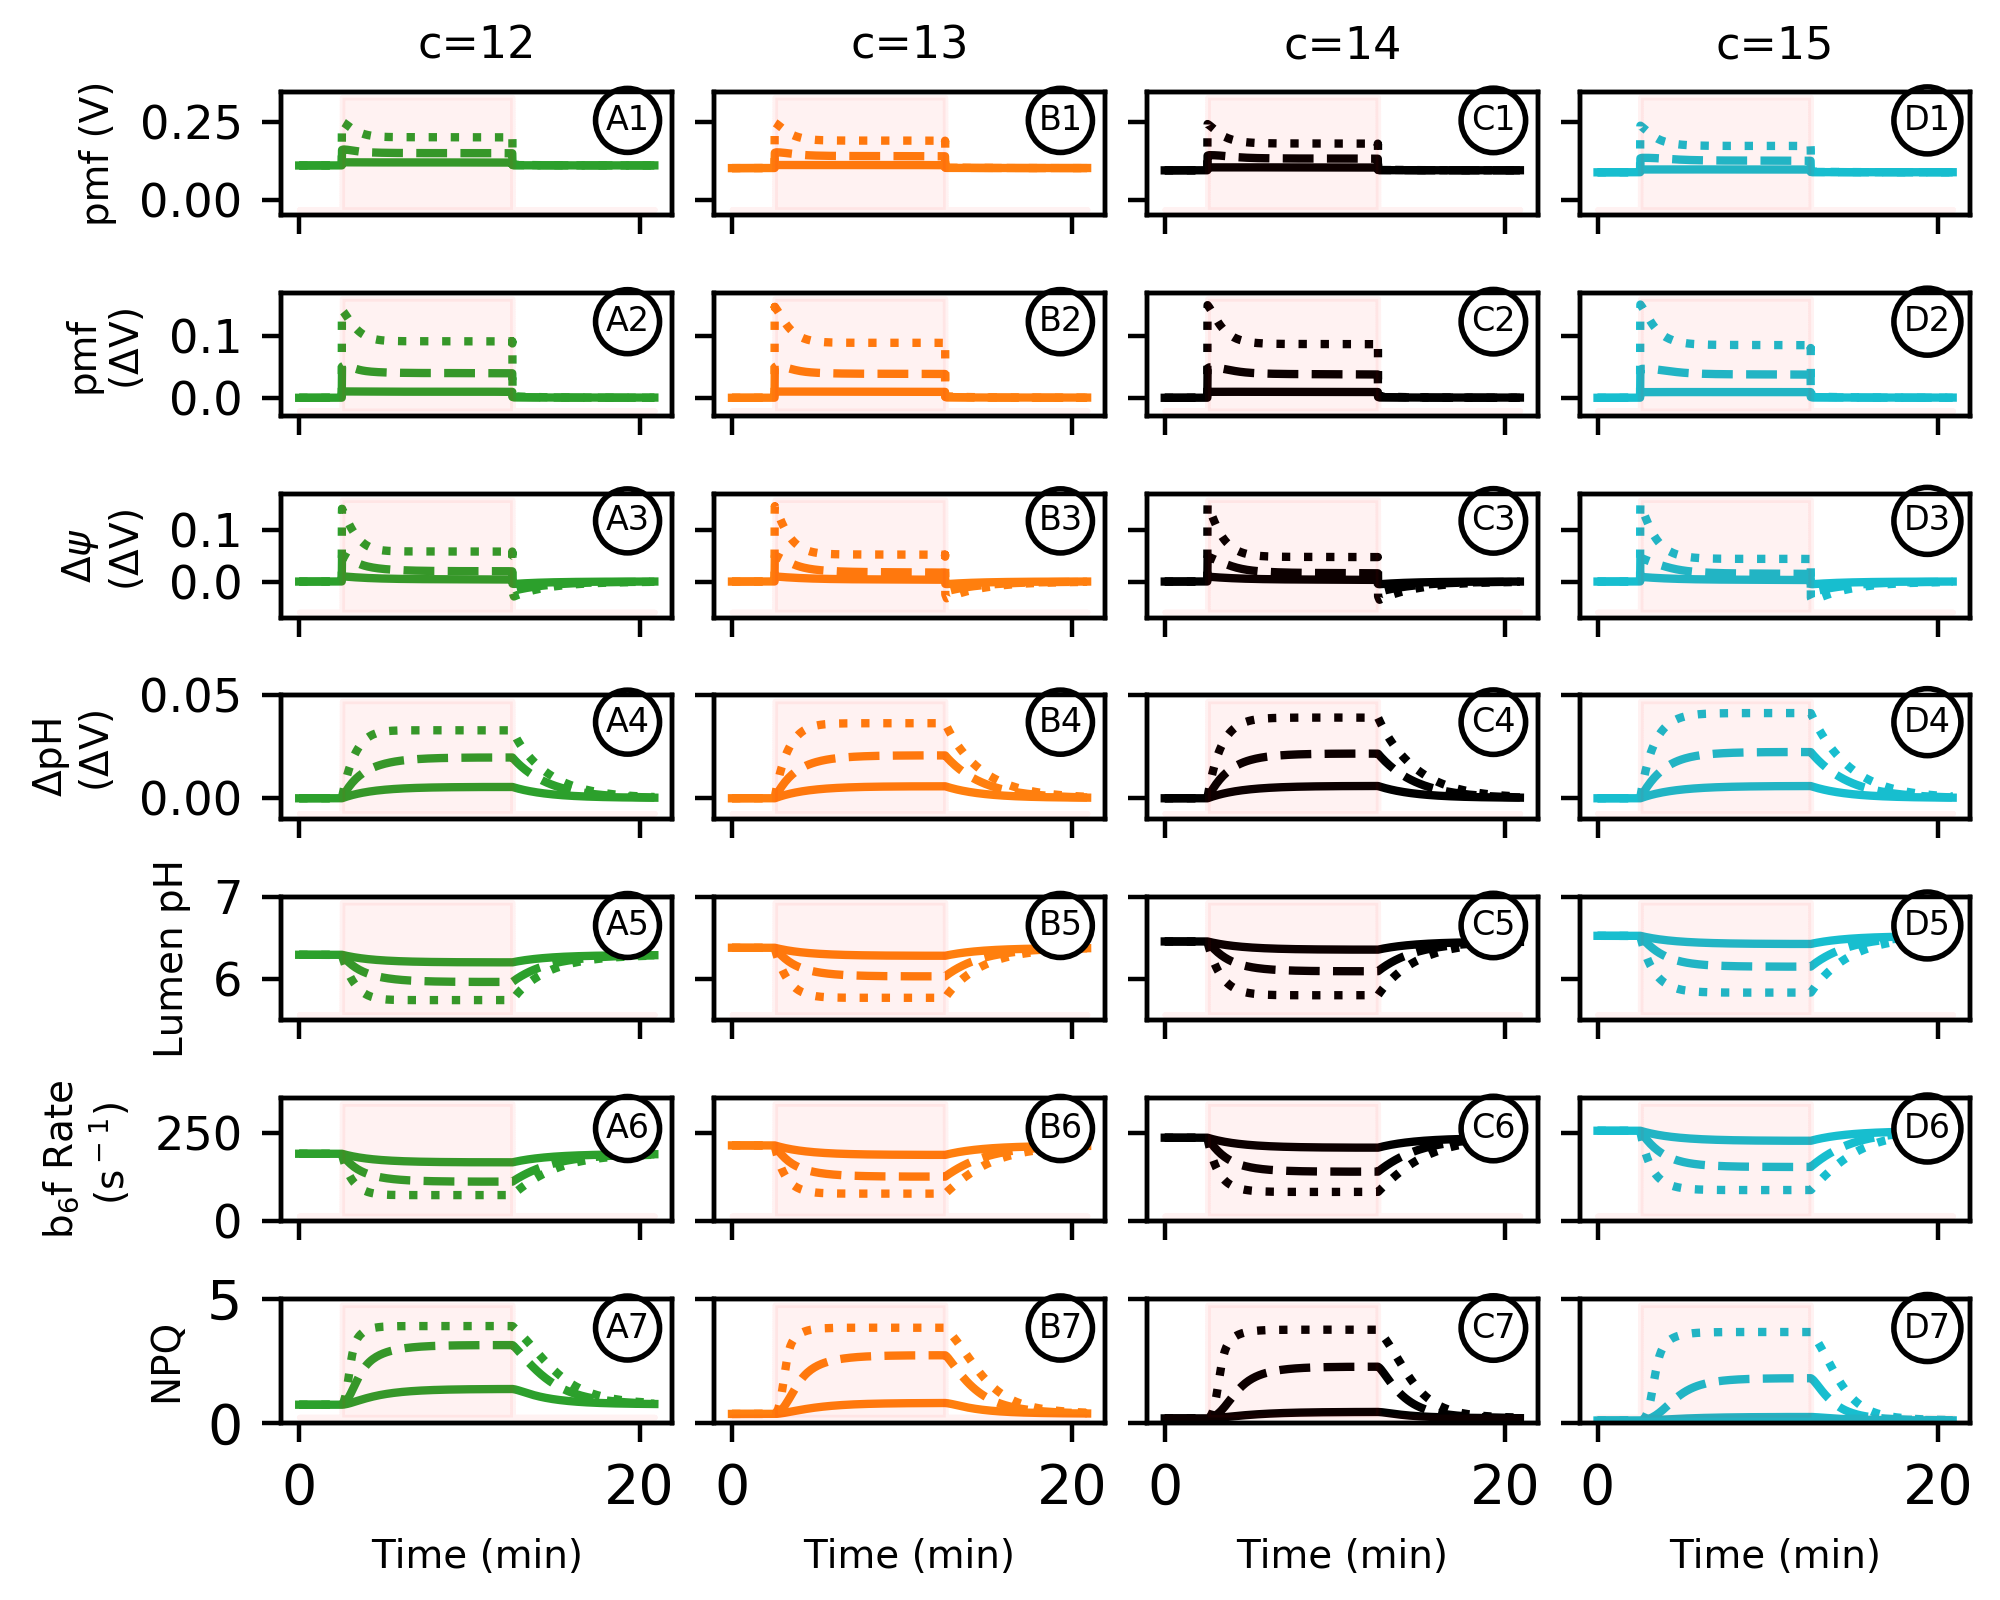

Simulated responses of the light reactions were performed as in Davis et al., 2017, with all standard conditions held constant except for the number of ATP synthase c-subunits. Simulations were performed using 10 minutes of static light at either 20 (solid lines), 100 (dashed lines), or 1000 (dotted lines) μmol photons m-2s-1 as in Figure 1. Intervals of light excitation are indicated by shaded regions. (Panels 1-4) The light–induced pmf (1, 2A-D) of ATP synthases with c–stoichiometries of 12 (green, column A), 13 (orange, column B), 14 (black, column C), or 15 (cyan, column D)are shown in units of volts, so that a ΔpH of one is equivalent to 0.06 V. The total pmf (panel 2), Δψ (panel 3), and ΔpH (panel 4) are shown as light–induced changes relative to the pmf dark values indicated as ΔV from dark values, to emphasize light–induced ATP synthase constraints. (5) Light–induced changes in lumen pH due to photosynthetic activity. Light intensities and c–ring composition as in (1). (6) The 

In [13]:
print('Supplemental Figure 1: Comparison of pmf composition and pH–mediated regulatory processes during '
      'photosynthesis in naturally occuring photosynthetic c-rings and c12 ring to balance ATP/NADPH with '
      'carbon assimilation.')
fig = plt.figure('Supplemental Figure 1', figsize=(5,4), dpi=200)
ax1 = fig.add_subplot(7,4,1)
ax2 = fig.add_subplot(7,4,2)
ax3 = fig.add_subplot(7,4,3)
ax4 = fig.add_subplot(7,4,4)
ax5 = fig.add_subplot(7,4,5)
ax6 = fig.add_subplot(7,4,6)
ax7 = fig.add_subplot(7,4,7)
ax8 = fig.add_subplot(7,4,8)
ax9 = fig.add_subplot(7,4,9)
ax10 = fig.add_subplot(7,4,10)
ax11 = fig.add_subplot(7,4,11)
ax12 = fig.add_subplot(7,4,12)
ax13 = fig.add_subplot(7,4,13)
ax14 = fig.add_subplot(7,4,14)
ax15 = fig.add_subplot(7,4,15)
ax16 = fig.add_subplot(7,4,16)
ax17 = fig.add_subplot(7,4,17)
ax18 = fig.add_subplot(7,4,18)
ax19 = fig.add_subplot(7,4,19)
ax20 = fig.add_subplot(7,4,20)
ax21 = fig.add_subplot(7,4,21)
ax22 = fig.add_subplot(7,4,22)
ax23 = fig.add_subplot(7,4,23)
ax24 = fig.add_subplot(7,4,24)
ax25 = fig.add_subplot(7,4,25)
ax26 = fig.add_subplot(7,4,26)
ax27 = fig.add_subplot(7,4,27)
ax28 = fig.add_subplot(7,4,28)


ax1b = ax1.twinx()
ax2b = ax2.twinx()
ax3b = ax3.twinx()
ax4b = ax4.twinx()
ax5b = ax5.twinx()
ax6b = ax6.twinx()
ax7b = ax7.twinx()
ax8b = ax8.twinx()
ax9b = ax9.twinx()
ax10b = ax10.twinx()
ax11b = ax11.twinx()
ax12b = ax12.twinx()
ax13b = ax13.twinx()
ax14b = ax14.twinx()
ax15b = ax15.twinx()
ax16b = ax16.twinx()
ax17b = ax17.twinx()
ax18b = ax18.twinx()
ax19b = ax19.twinx()
ax20b = ax20.twinx()
ax21b = ax21.twinx()
ax22b = ax22.twinx()
ax23b = ax23.twinx()
ax24b = ax24.twinx()
ax25b = ax25.twinx()
ax26b = ax26.twinx()
ax27b = ax27.twinx()
ax28b = ax28.twinx()
        
axes_row1 = [ax1,ax2,ax3,ax4]
axes_row2 = [ax5,ax6,ax7,ax8]
axes_row3 = [ax9,ax10,ax11,ax12]
axes_row4 = [ax13,ax14,ax15,ax16]
axes_row5 = [ax17,ax18,ax19,ax20]
axes_row6 = [ax21,ax22,ax23,ax24]
axes_row7 = [ax25,ax26,ax27,ax28]
c_stoichiometry = ['12','13','14','15']


for key in output_dict:
    if "single 10 min" in str(key):
        light=key.split('single 10 min ')[1]
        light=light.split(' light')[0]
            
        for i in range(len(axes_row1)):
            subplot_row1 = axes_row1[i]
            subplot_row2 = axes_row2[i]
            subplot_row3 = axes_row3[i]
            subplot_row4 = axes_row4[i]
            subplot_row5 = axes_row5[i]
            subplot_row6 = axes_row6[i]
            subplot_row7 = axes_row7[i]
            c = c_stoichiometry[i]
            if c == key.split('=')[1]:                                   
                subplot_row1.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                        color=set_of_c_stoichiometries[int(c)],linestyle=flat_light_intensities[int(light)])
                subplot_row2.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                        color=set_of_c_stoichiometries[int(c)],linestyle=flat_light_intensities[int(light)])
                subplot_row3.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                        color=set_of_c_stoichiometries[int(c)],linestyle=flat_light_intensities[int(light)])
                subplot_row4.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                        color=set_of_c_stoichiometries[int(c)],linestyle=flat_light_intensities[int(light)])
                subplot_row5.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                        color=set_of_c_stoichiometries[int(c)],linestyle=flat_light_intensities[int(light)])
                subplot_row6.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                        color=set_of_c_stoichiometries[int(c)],linestyle=flat_light_intensities[int(light)])
                subplot_row7.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                        color=set_of_c_stoichiometries[int(c)],linestyle=flat_light_intensities[int(light)])

axes = [ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,ax8b,ax9b,ax10b,ax11b,ax12b,ax13b,ax14b,ax15b,ax16b,ax17b,ax18b,ax19b,
        ax20b,ax21b,ax22b,ax23b,ax24b,ax25b,ax26b,ax27b,ax28b,ax29b,ax30b,ax31b,ax32b,ax33b,ax34b,ax35b]

for key in output_dict:
    for i in range(len(axes)):
        subplot=axes[i]
        if "single 10 min" in str(key):
            c=key.split('=')[1]
            light=key.split('single 10 min ')[1]
            light=light.split(' light')[0]        
            if light == '1000' and c == '8':
                subplot.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                                     color='red', alpha=0.05,zorder=2)

ax1.set_ylabel('pmf (V)',fontsize=7)
ax5.set_ylabel('pmf\n ($\Delta$V)',fontsize=7)
ax9.set_ylabel('$\Delta$$\psi$\n ($\Delta$V)',fontsize=7)
ax13.set_ylabel('$\Delta$pH\n ($\Delta$V)',fontsize=7)
ax17.set_ylabel('Lumen pH',fontsize=7)
ax21.set_ylabel('b$_6$f Rate\n (s$^-$$^1$)',fontsize=7)
ax25.set_ylabel('NPQ',fontsize=7)


axes = [ax2,ax3,ax4,ax6,ax7,ax8,ax10,ax11,ax12,ax14,ax15,ax16,ax18,ax19,ax20,ax22,ax23,ax24,ax26,ax27,ax28,
        ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,ax8b,ax9b,ax10b,ax11b,ax12b,ax13b,
        ax14b,ax15b,ax16b,ax17b,ax18b,ax19b,ax20b,ax21b,ax22b,ax23b,ax24b,ax25b,ax26b,ax27b,ax28b]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.set_yticklabels([])
    
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,
        ax17,ax18,ax19,ax20,ax21,ax22,ax23,ax24]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.set_xticklabels([])
    
axes = [ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,ax8b,ax9b,ax10b,ax11b,ax12b,ax13b,
        ax14b,ax15b,ax16b,ax17b,ax18b,ax19b,ax20b,ax21b,ax22b,ax23b,ax24b,ax25b,ax26b,ax27b,ax28b]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.tick_params(right='off')


props = dict(boxstyle='circle', facecolor='white')
labels = ['A1','B1','C1','D1']
for i in range(len(axes_row1)):
    subplot=axes_row1[i]
    label=labels[i]
    subplot.text(18, .31, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.05, top=0.35)
labels = ['A2','B2','C2','D2']
for i in range(len(axes_row2)):
    subplot=axes_row2[i]
    label=labels[i]
    subplot.text(18, .15, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.03, top=0.17)
labels = ['A3','B3','C3','D3']
for i in range(len(axes_row3)):
    subplot=axes_row3[i]
    label=labels[i]
    subplot.text(18, .15, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.07, top=0.17)    
labels = ['A4','B4','C4','D4']
for i in range(len(axes_row4)):
    subplot=axes_row4[i]
    label=labels[i]
    subplot.text(18, .045, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.01, top=0.05)
labels = ['A5','B5','C5','D5']
for i in range(len(axes_row5)):
    subplot=axes_row5[i]
    label=labels[i]
    subplot.text(18, 6.85, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=5.5, top=7)
labels = ['A6','B6','C6','D6']
for i in range(len(axes_row6)):
    subplot=axes_row6[i]
    label=labels[i]
    subplot.text(18, 310, label, fontsize=6,verticalalignment='top', bbox=props) 
    subplot.set_ylim(bottom=0, top=350)

labels = ['A7','B7','C7','D7']
for i in range(len(axes_row7)):
    subplot=axes_row7[i]
    label=labels[i]
    subplot.text(18, 4.5, label, fontsize=6,verticalalignment='top', bbox=props) 
    subplot.set_ylim(bottom=0, top=5)
    subplot.set_xlabel('Time (min)',fontsize=7)
    
axes = [ax1,ax5,ax9,ax13,ax17,ax21]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.tick_params(axis='y',labelsize='small')

axes = [ax1,ax2,ax3,ax4]
titles = ['c=12','c=13','c=14','c=15']
for i in range(len(axes)):
    subplot=axes[i]
    title=titles[i]
    subplot.set_title(title, size=8)
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=.5)
plt.show()
print('Simulated responses of the light reactions were performed as in Davis et al., 2017, with all standard ' 
      'conditions held constant except for the number of ATP synthase c-subunits. Simulations were performed using ' 
      '10 minutes of static light at either 20 (solid lines), 100 (dashed lines), or 1000 (dotted lines) μmol ' 
      'photons m-2s-1 as in Figure 1. Intervals of light excitation are indicated by shaded regions. (Panels 1-4) '
      'The light–induced pmf (1, 2A-D) of ATP synthases with c–stoichiometries of 12 (green, column A), 13 (orange, '
      'column B), 14 (black, column C), or 15 (cyan, column D)are shown in units of volts, so that a ΔpH of one is ' 
      'equivalent to 0.06 V. The total pmf (panel 2), Δψ (panel 3), and ΔpH (panel 4) are shown as light–'
      'induced changes relative to the pmf dark values indicated as ΔV from dark values, to emphasize light–induced ' 
      'ATP synthase constraints. (5) Light–induced changes in lumen pH due to photosynthetic activity. Light ' 
      'intensities and c–ring composition as in (1). (6) The relative rate constant for plastoquinol oxidation at ' 
      'the cytochrome b6f complex and (7) the extent of nonphotochemical quenching qE component for each c–ring '
      'size due to the light–induced changes in lumen pH.')

In [25]:
#generate a one hour square light pulse
baseline_duration=150 #in seconds
baseline_intensity=0 #dark baseline
pulse_duration=3600 #3600 seconds pulse
pulse_intensity=201.3 #pulse is 201.3 units
recovery_duration = 500 #500 seconds recovery
recovery_intensity=0 #recovery is dark
rise_time=1 #100 ms for the light to rise
time_units='seconds' 
point_frequency=100 #start with a frequency of 100 points per subtrace
repeat_cycles=1 #do this once
wave=generate_square_wave_based_light_sequence (baseline_duration, baseline_intensity,
                    pulse_duration, pulse_intensity, recovery_duration, recovery_intensity, 
                    rise_time, time_units, point_frequency, repeat_cycles)
light_pattern['single_square_60_min_201.3_max']=wave

In [26]:
#run simulations for the one hour pulse
#all standard conditions remain unchanged
#vary n (H+/ATP) based on each c-subunit stoichiometry in set_of_c_stoichiometries dictionary

for c_stoichiometry in set_of_c_stoichiometries:
    n = c_stoichiometry/3
    on='single pulse 201.3umolE subunits='+str(c_stoichiometry) #the output name

    Kx=sim_constants() #generrate arrays contining optimized time segments for the simulation
    Kx.k_KEA=0
    Kx.fraction_pH_effect=.25

    Kx.n=n
    constants_dict[on]=Kx #store constants in constants_dict

    constants_dict[on]=Kx #store constants in constants_dict

    output_dict[on], starting_conditions_dict[on]=sim(Kx, original_dark_equilibrated_initial_y, 
                                            light_pattern['single_square_60_min_201.3_max'], 
                                            max_light_change, points_per_segment, dark_equilibration=60*60)
    
    Changed_Constants_Table('Change Constants', Kx_initial, Kx)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 2.6666666666666665]]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 3.6666666666666665]]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 4.0]]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 4.333333333333333]]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value']]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 5.0]]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=101.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 5.666666666666667]]

In [27]:
#make a single one hour sin wave with max PAR of 402.71 umolE

total_duration=60*60 #duration is in seconds, so we do 3600 
light_frequency=1/(60*60) #make the frequency the same as the duration to get one cycle
points_per_second=10
max_PAR=402.71
wave=generate_sin_wave (total_duration, max_PAR, light_frequency, points_per_second)
light_pattern['single_sin_wave_1_hr_402.71_max']=wave

In [28]:
#run simulations for the one hour sin wave
#all standard conditions remain unchanged
#vary n (H+/ATP) based on each c-subunit stoichiometry in set_of_c_stoichiometries dictionary

for c_stoichiometry in set_of_c_stoichiometries:
    n = c_stoichiometry/3
    on='single sin wave 402.71umolE subunits='+str(c_stoichiometry) #the output name

    Kx=sim_constants() #generrate arrays contining optimized time segments for the simulation
    Kx.k_KEA=0
    Kx.fraction_pH_effect=.25

    Kx.n=n
    constants_dict[on]=Kx #store constants in constants_dict

    constants_dict[on]=Kx #store constants in constants_dict

    output_dict[on], starting_conditions_dict[on]=sim(Kx, original_dark_equilibrated_initial_y, 
                                            light_pattern['single_sin_wave_1_hr_402.71_max'], 
                                            max_light_change, points_per_segment, dark_equilibration=60*60)

    Changed_Constants_Table('Change Constants', Kx_initial, Kx)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=773.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['light_per_L', 0.0, 0.9991346263789401],
 ['n', 4.666666666666667, 2.6666666666666665]]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=773.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['light_per_L', 0.0, 0.9991346263789401],
 ['n', 4.666666666666667, 3.6666666666666665]]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=773.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['light_per_L', 0.0, 0.9991346263789401],
 ['n', 4.666666666666667, 4.0]]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=773.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['light_per_L', 0.0, 0.9991346263789401],
 ['n', 4.666666666666667, 4.333333333333333]]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=773.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['light_per_L', 0.0, 0.9991346263789401]]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=773.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['light_per_L', 0.0, 0.9991346263789401],
 ['n', 4.666666666666667, 5.0]]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=773.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['light_per_L', 0.0, 0.9991346263789401],
 ['n', 4.666666666666667, 5.666666666666667]]

In [29]:
#run simulations for a one hour square light wave
#5 minute light cycle between 0 umolE and 400 umolE
#all standard conditions remain unchanged
#vary n (H+/ATP) based on each c-subunit stoichiometry in set_of_c_stoichiometries dictionary

for c_stoichiometry in set_of_c_stoichiometries:
    n = c_stoichiometry/3
    on='square wave 60 min max 400 light subunits='+str(c_stoichiometry) #the output name

    Kx=sim_constants() #generate arrays contining optimized time segments for the simulation
    Kx.k_KEA=0
    Kx.fraction_pH_effect=.25

    Kx.n=n
    constants_dict[on]=Kx #store constants in constants_dict

    constants_dict[on]=Kx #store constants in constants_dict

    output_dict[on], starting_conditions_dict[on]=sim(Kx, original_dark_equilibrated_initial_y, 
                                            light_pattern['one_hour_5_min_cycle_square_wave_max_PAR_600'], 
                                            max_light_change, points_per_segment, dark_equilibration=60*60)
    Changed_Constants_Table('Change Constants', Kx_initial, Kx)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1201.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 2.6666666666666665]]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1201.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 3.6666666666666665]]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1201.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 4.0]]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1201.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 4.333333333333333]]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1201.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value']]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1201.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 5.0]]

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1201.0)

Change Constants


[['Changed Parameter', 'Old Value', 'New Value'],
 ['n', 4.666666666666667, 5.666666666666667]]

Supplemental Figure 2:  Altered ATP synthase c8 stoichiometry impacts pmf composition and pH–mediated regulatory processes during photosynthesis under increasingly dynamic light environments.


<IPython.core.display.Javascript object>


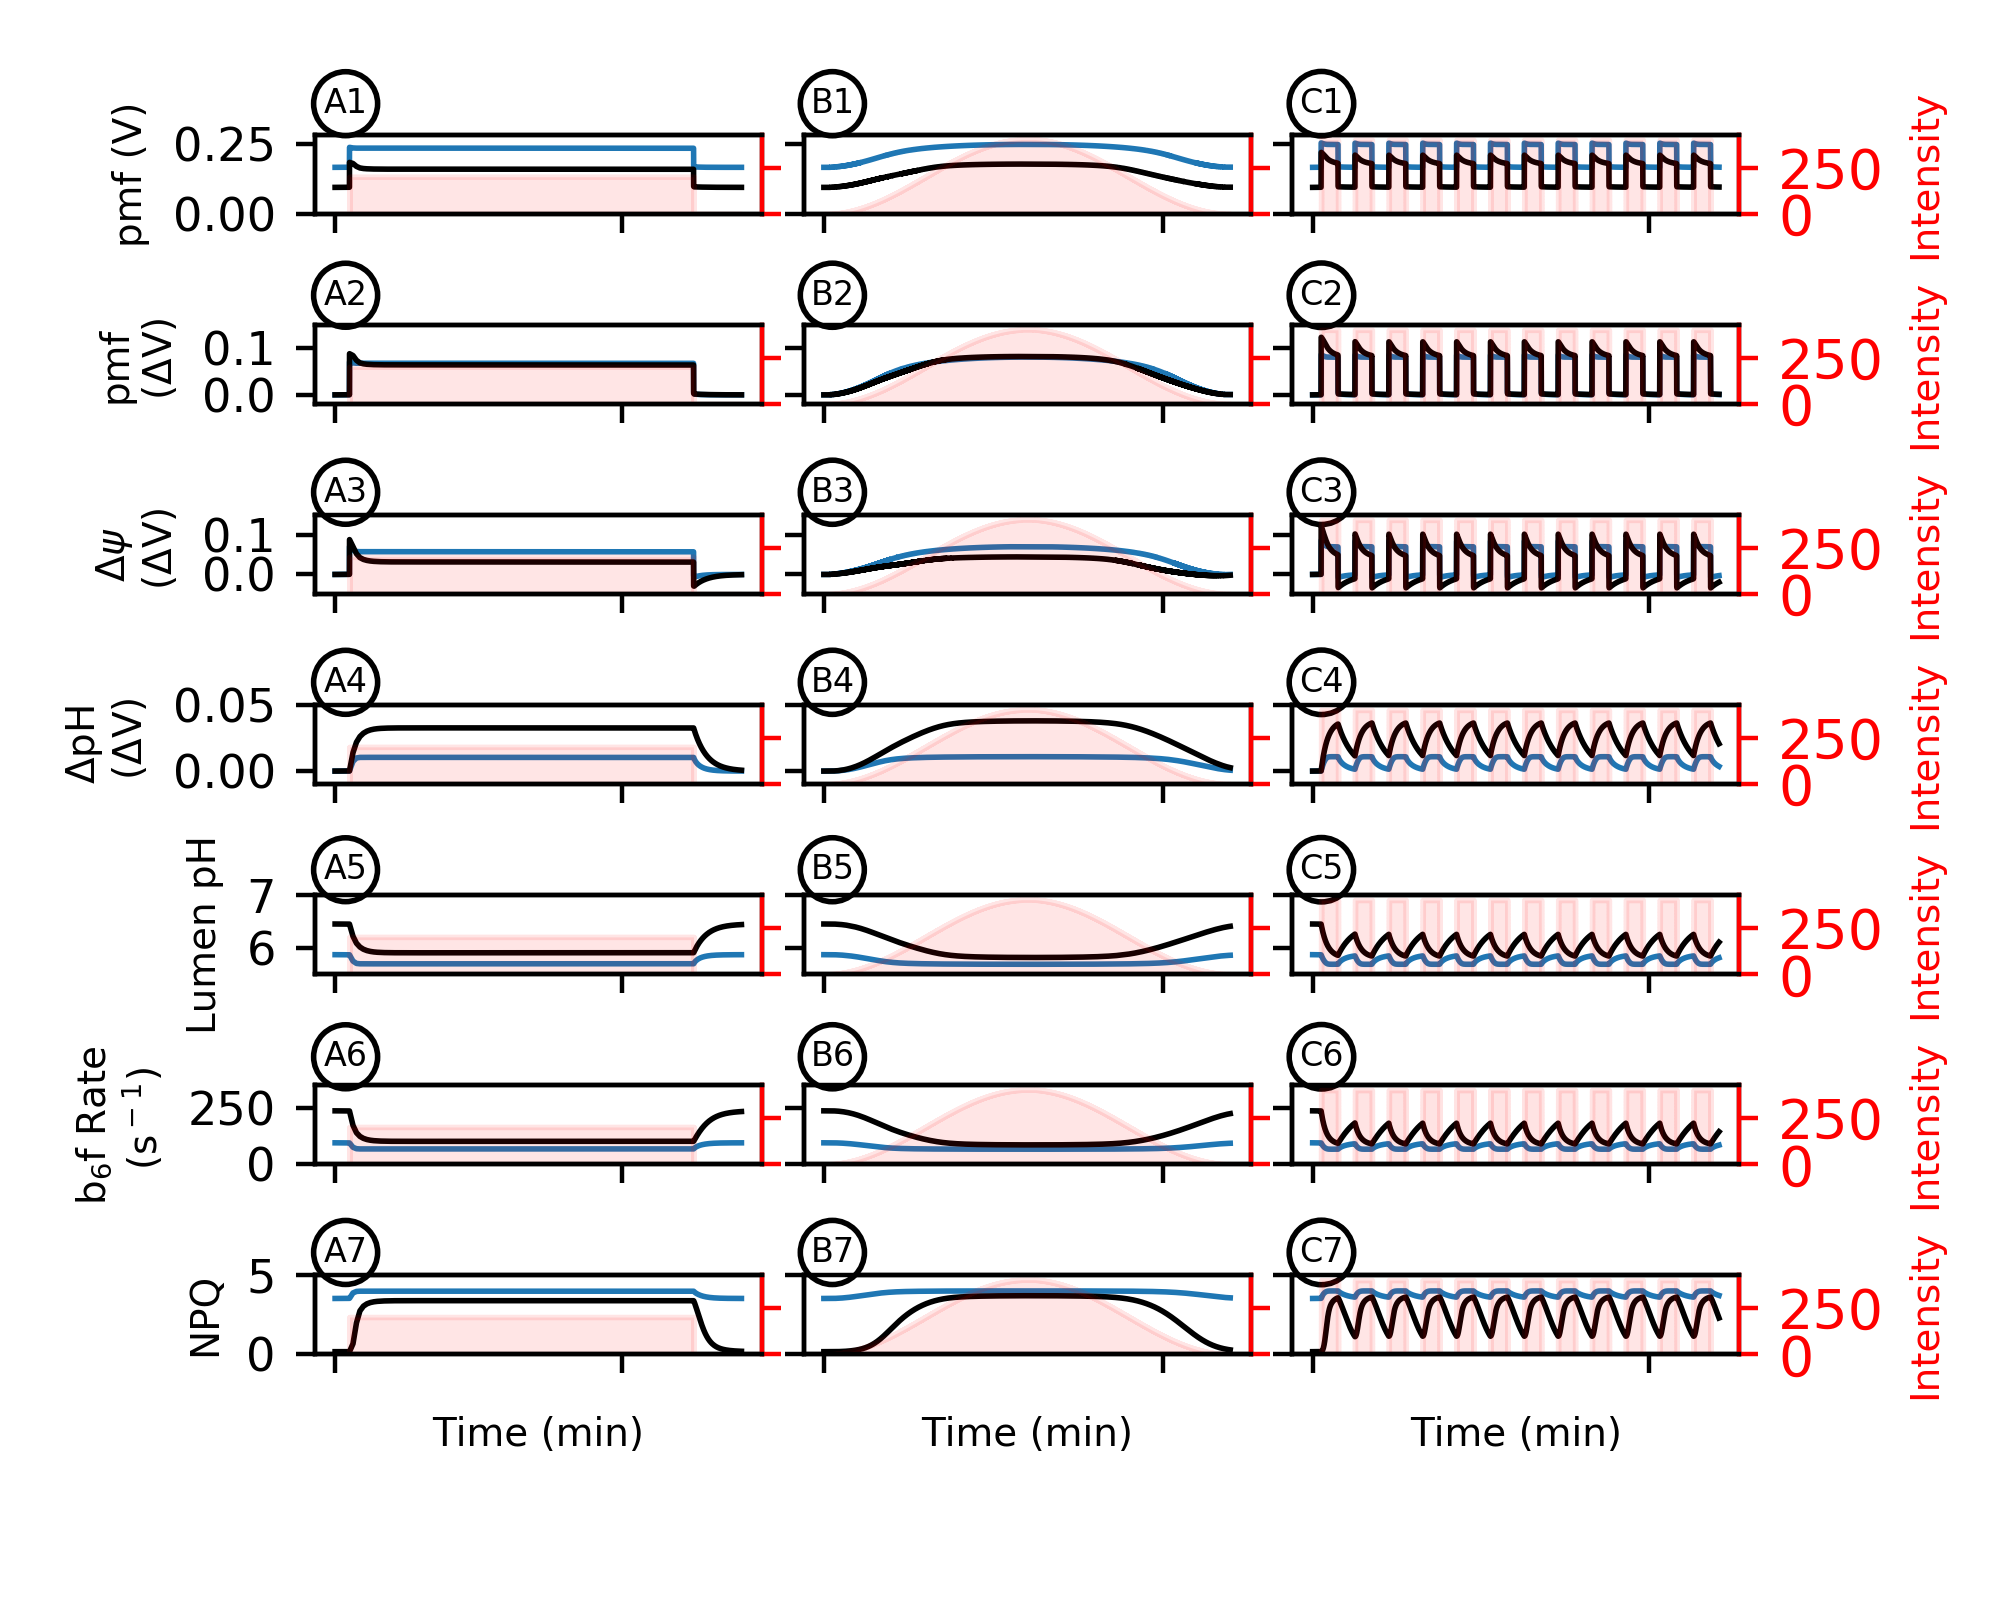

Simulated responses of the light reactions were performed as in Davis et al., 2017, with all standard conditions held constant except for the number of ATP synthase c-subunits. Simulations were performed using 1-hour of either static light (A), sinusoidal light (B), or square wave fluctuating light (C) with equal total photon flux over the total duration of each light treatment. Intervals of light excitation are indicated by shaded regions. (Panels 1-4) The light–induced pmf of ATP synthases with c–stoichiometries of 8 (blue) or 14 (black) are shown in units of volts, so that a ΔpH of one is equivalent to 0.06 V. The total pmf (panel 2), Δψ (panel 3), and ΔpH (panel 4) are shown as light–induced changes relative to the pmf dark values indicated as ΔV from dark values, to emphasize light–induced ATP synthase constraints. (5) Light–induced changes in lumen pH due to photosynthetic activity. Light intensities and c–ring composition as in (1). (6) The relative rate constant for plastoquino

In [59]:
print('Supplemental Figure 2:  Altered ATP synthase c8 stoichiometry impacts pmf composition and pH–mediated '
      'regulatory processes during photosynthesis under increasingly dynamic light environments.')
fig = plt.figure('Supplemental Figure 2', figsize=(5,4), dpi=200)
ax1 = fig.add_subplot(8,3,1)
ax2 = fig.add_subplot(8,3,2)
ax3 = fig.add_subplot(8,3,3)
ax4 = fig.add_subplot(8,3,4)
ax5 = fig.add_subplot(8,3,5)
ax6 = fig.add_subplot(8,3,6)
ax7 = fig.add_subplot(8,3,7)
ax8 = fig.add_subplot(8,3,8)
ax9 = fig.add_subplot(8,3,9)
ax10 = fig.add_subplot(8,3,10)
ax11 = fig.add_subplot(8,3,11)
ax12 = fig.add_subplot(8,3,12)
ax13 = fig.add_subplot(8,3,13)
ax14 = fig.add_subplot(8,3,14)
ax15 = fig.add_subplot(8,3,15)
ax16 = fig.add_subplot(8,3,16)
ax17 = fig.add_subplot(8,3,17)
ax18 = fig.add_subplot(8,3,18)
ax19 = fig.add_subplot(8,3,19)
ax20 = fig.add_subplot(8,3,20)
ax21 = fig.add_subplot(8,3,21)

ax1b = ax1.twinx()
ax2b = ax2.twinx()
ax3b = ax3.twinx()
ax4b = ax4.twinx()
ax5b = ax5.twinx()
ax6b = ax6.twinx()
ax7b = ax7.twinx()
ax8b = ax8.twinx()
ax9b = ax9.twinx()
ax10b = ax10.twinx()
ax11b = ax11.twinx()
ax12b = ax12.twinx()
ax13b = ax13.twinx()
ax14b = ax14.twinx()
ax15b = ax15.twinx()
ax16b = ax16.twinx()
ax17b = ax17.twinx()
ax18b = ax18.twinx()
ax19b = ax19.twinx()
ax20b = ax20.twinx()
ax21b = ax21.twinx()

for key in output_dict:
    c=key.split('=')[1]
    if c == "8":
        if "single pulse 201.3umolE subunits" in str(key):
            ax1.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                    color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax4.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                    color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax7.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                    color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax10.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                    color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax13.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                    color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax16.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                    color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax19.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                    color=set_of_c_stoichiometries[int(c)],linewidth=1)

            
            ax1b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax4b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax7b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax10b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax13b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax16b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax19b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)        
        if "single sin wave 402.71umolE subunits" in str(key):
            ax2.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax5.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax8.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax11.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax14.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax17.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax20.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)

            
            ax2b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax5b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax8b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax11b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax14b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax17b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax20b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)        

        if "square wave 60 min max 400 light subunits" in str(key):
            ax3.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax6.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax9.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax12.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax15.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax18.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax21.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)

            
            ax3b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax6b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax9b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax12b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax15b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax18b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.11,zorder=2)
            ax21b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)        
    if c == "14":
        if "single pulse 201.3umolE subunits" in str(key):
            ax1.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax4.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax7.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax10.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax13.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax16.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax19.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
        if "single sin wave 402.71umolE subunits" in str(key):
            ax2.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax5.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax8.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax11.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax14.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax17.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax20.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
        if "square wave 60 min max 400 light subunits" in str(key):
            ax3.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax6.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax9.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax12.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax15.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax18.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax21.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)


ax1.set_ylabel('pmf (V)',fontsize=7)
ax4.set_ylabel('pmf\n ($\Delta$V)',fontsize=7)
ax7.set_ylabel('$\Delta$$\psi$\n ($\Delta$V)',fontsize=7)
ax10.set_ylabel('$\Delta$pH\n ($\Delta$V)',fontsize=7)
ax13.set_ylabel('Lumen pH',fontsize=7)
ax16.set_ylabel('b$_6$f Rate\n (s$^-$$^1$)',fontsize=7)
ax19.set_ylabel('NPQ',fontsize=7)
ax3b.set_ylabel('Intensity',fontsize=7)
ax6b.set_ylabel('Intensity',fontsize=7)
ax9b.set_ylabel('Intensity',fontsize=7)
ax12b.set_ylabel('Intensity',fontsize=7)
ax15b.set_ylabel('Intensity',fontsize=7)
ax18b.set_ylabel('Intensity',fontsize=7)
ax21b.set_ylabel('Intensity',fontsize=7)

axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18,
        ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,ax8b,ax9b,ax10b,ax11b,ax12b,ax13b,ax14b,ax15b,
        ax16b,ax17b,ax18b,ax19b,ax20b,ax21b]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.set_xticklabels([])
    
axes = [ax2,ax3,ax5,ax6,ax8,ax9,ax11,ax12,ax14,ax15,ax17,ax18,ax20,ax21,
        ax1b,ax2b,ax4b,ax5b,ax7b,ax8b,ax10b,ax11b,ax13b,ax14b,ax16b,ax17b,ax19b,ax20b]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.set_yticklabels([])
    
props = dict(boxstyle='circle', facecolor='white')
labels = ['A1','B1','C1']
axes = [ax1,ax2,ax3]
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .45, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=0, top=0.28)
axes = [ax4,ax5,ax6]
labels = ['A2','B2','C2']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .25, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.02, top=0.15)
axes = [ax7,ax8,ax9]
labels = ['A3','B3','C3']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .25, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.05, top=0.15)    
axes = [ax10,ax11,ax12]
labels = ['A4','B4','C4']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .08, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.01, top=0.05)
axes = [ax13,ax14,ax15]
labels = ['A5','B5','C5']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, 7.8, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=5.5, top=7)
axes = [ax16,ax17,ax18]
labels = ['A6','B6','C6']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, 550, label, fontsize=6,verticalalignment='top', bbox=props) 
    subplot.set_ylim(bottom=0, top=350)
axes = [ax19,ax20,ax21]
labels = ['A7','B7','C7']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, 7.5, label, fontsize=6,verticalalignment='top', bbox=props) 
    subplot.set_ylim(bottom=0, top=5)
    subplot.set_xlabel('Time (min)',fontsize=7)
    
axes = [ax1,ax4,ax7,ax10,ax13,ax16,ax19]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.tick_params(axis='y',labelsize='small')
    
axes = [ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,
        ax8b,ax9b,ax10b,ax11b,ax12b,ax13b,ax14b,
        ax15b,ax16b,ax17b,ax18b,ax19b,ax20b,ax21b]
for i in range(len(axes)):
    subplot = axes[i]
    subplot.set_ylim(bottom=0, top=425)
    subplot.yaxis.label.set_color('red')
    subplot.spines['right'].set_color('red')
    subplot.tick_params(axis='y', colors='red')
    if i not in [2,5,8,11,14,17,20]:
        subplot.set_yticklabels([])
        
plt.tight_layout(pad=1, w_pad=0.5, h_pad=0)
plt.show()
print('Simulated responses of the light reactions were performed as in Davis et al., 2017, with all standard '
      'conditions held constant except for the number of ATP synthase c-subunits. Simulations were performed using '
      '1-hour of either static light (A), sinusoidal light (B), or square wave fluctuating light (C) with equal '
      'total photon flux over the total duration of each light treatment. Intervals of light excitation are '
      'indicated by shaded regions. (Panels 1-4) The light–induced pmf of ATP synthases with c–stoichiometries of 8 '
      '(blue) or 14 (black) are shown in units of volts, so that a ΔpH of one is equivalent to 0.06 V. The total ' 
      'pmf (panel 2), Δψ (panel 3), and ΔpH (panel 4) are shown as light–induced changes relative to the pmf dark '
      'values indicated as ΔV from dark values, to emphasize light–induced ATP synthase constraints. (5) Light–'
      'induced changes in lumen pH due to photosynthetic activity. Light intensities and c–ring composition as in '
      '(1). (6) The relative rate constant for plastoquinol oxidation at the cytochrome b6f complex and (7) the '
      'extent of nonphotochemical quenching qE component for each c–ring size due to the light–induced changes in '
      'lumen pH.')

Supplemental Figure 3:  Altered ATP synthase c11 stoichiometry impacts pmf composition and pH–mediated regulatory processes during photosynthesis under increasingly dynamic light environments.


<IPython.core.display.Javascript object>


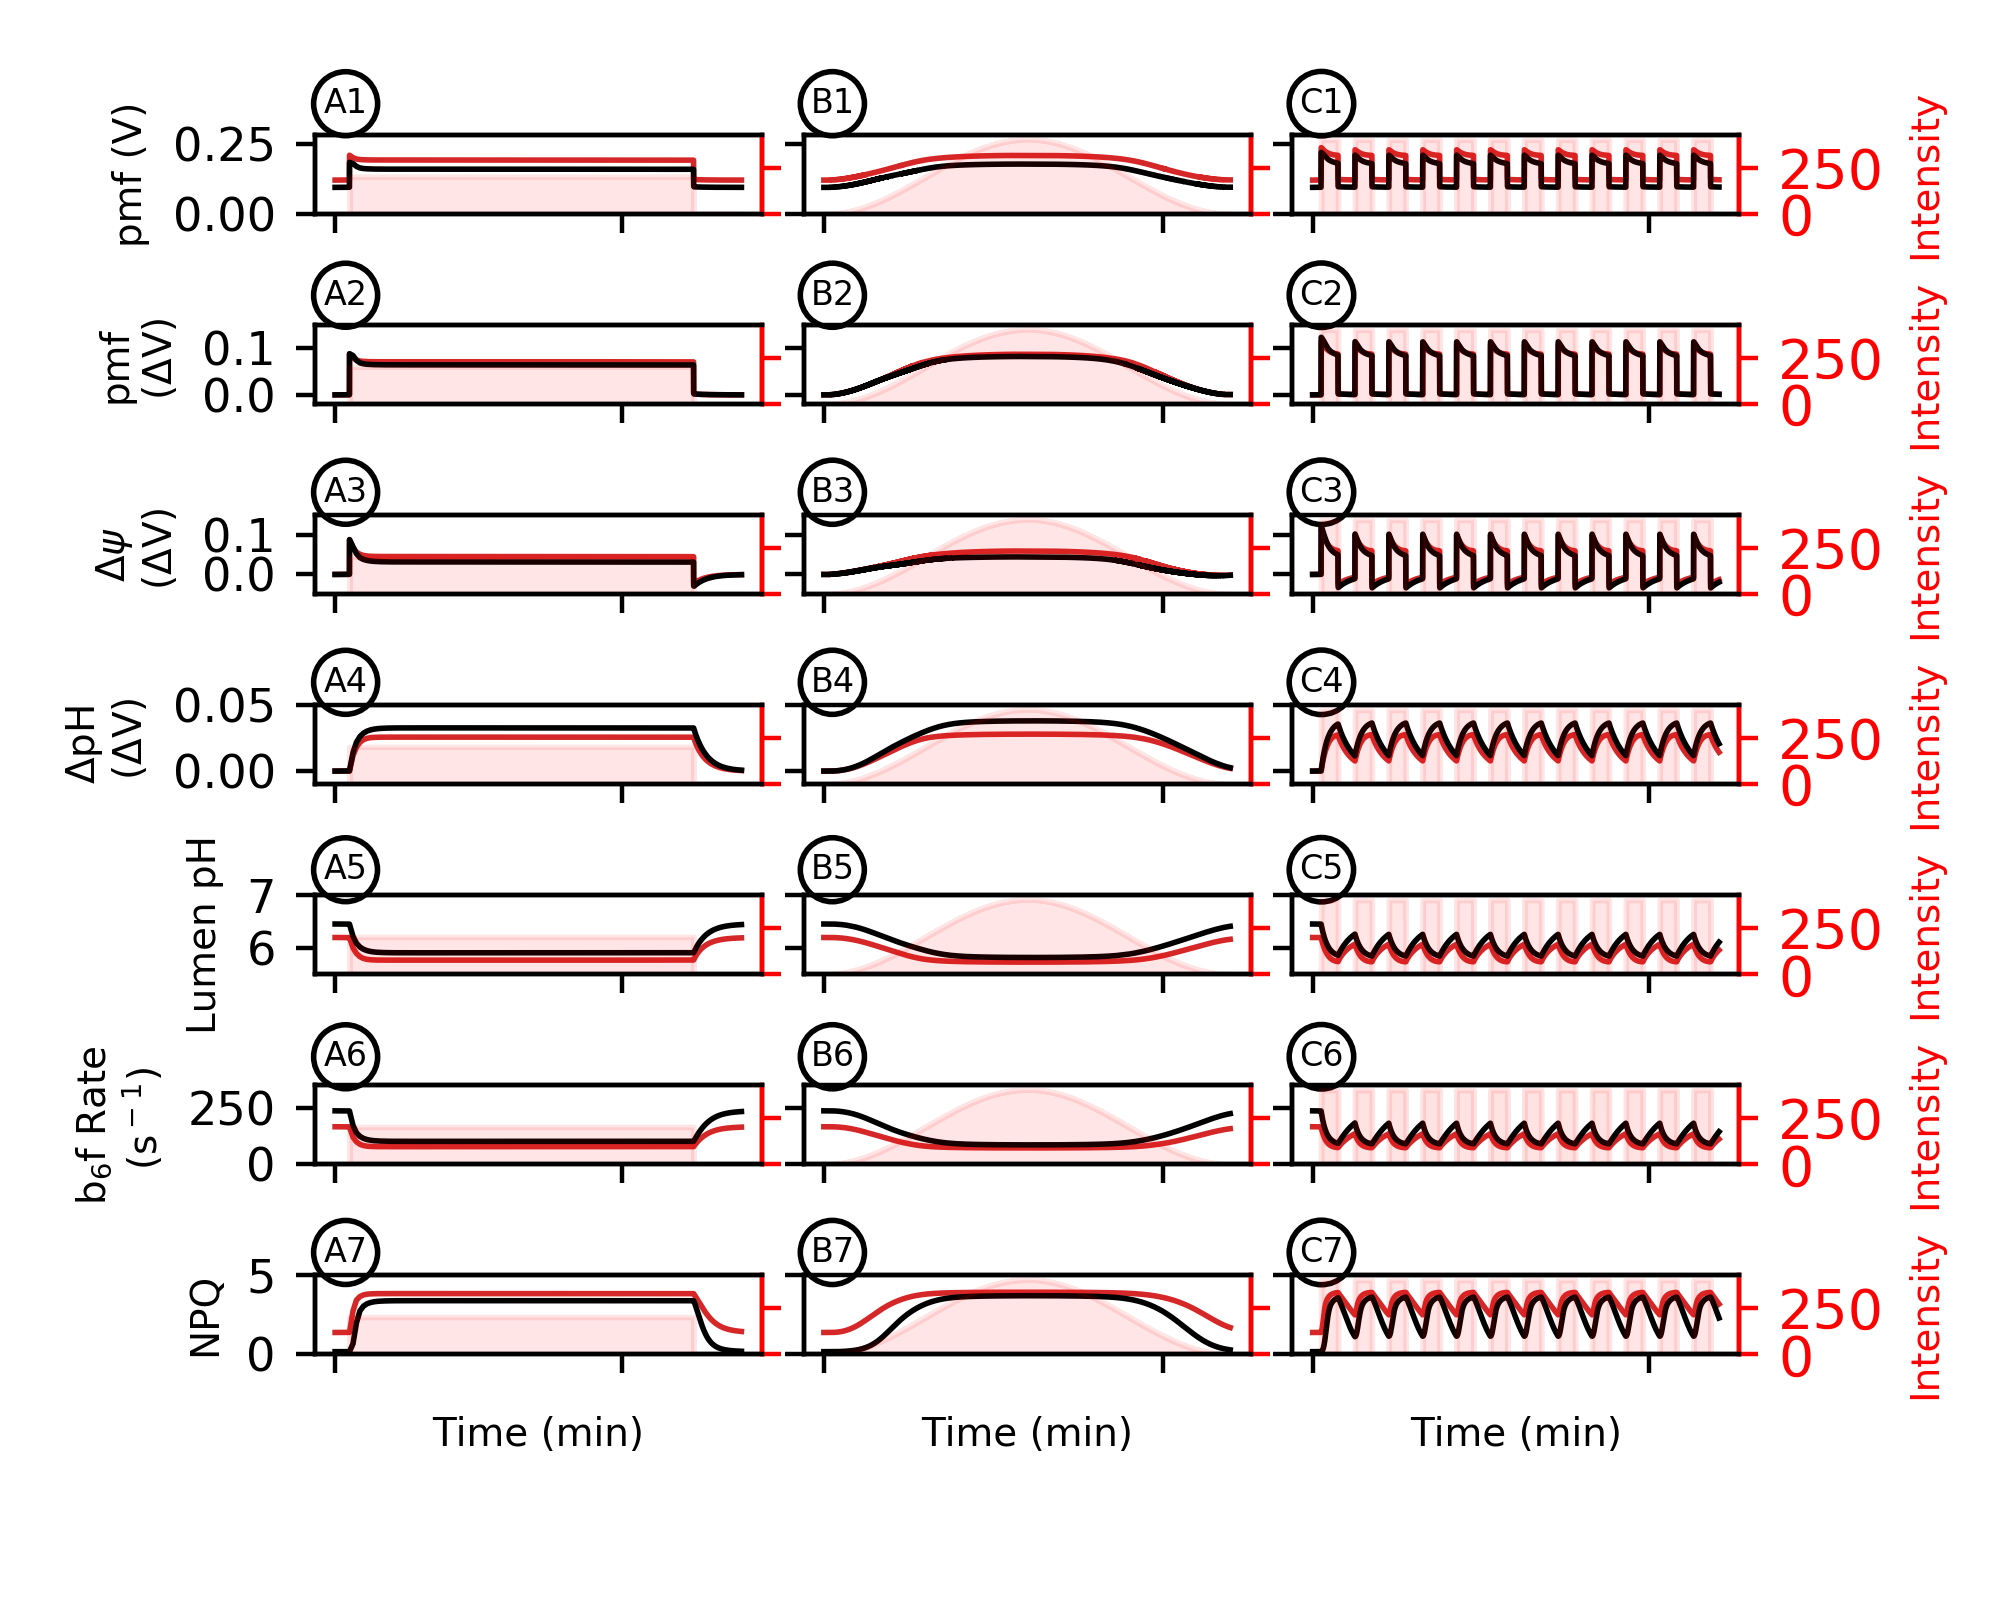

Simulated responses of the light reactions were performed as in Davis et al., 2017, with all standard conditions held constant except for the number of ATP synthase c-subunits. Simulations were performed using 1-hour of either static light (A), sinusoidal light (B), or square wave fluctuating light (C) with equal total photon flux over the total duration of each light treatment. Intervals of light excitation are indicated by shaded regions. (Panels 1-4) The light–induced pmf of ATP synthases with c–stoichiometries of 11 (red) or 14 (black) are shown in units of volts, so that a ΔpH of one is equivalent to 0.06 V. The total pmf (panel 2), Δψ (panel 3), and ΔpH (panel 4) are shown as light–induced changes relative to the pmf dark values indicated as ΔV from dark values, to emphasize light–induced ATP synthase constraints. (5) Light–induced changes in lumen pH due to photosynthetic activity. Light intensities and c–ring composition as in (1). (6) The relative rate constant for plastoquino

In [60]:
print('Supplemental Figure 3:  Altered ATP synthase c11 stoichiometry impacts pmf composition and pH–mediated '
      'regulatory processes during photosynthesis under increasingly dynamic light environments.')

fig = plt.figure('Supplemental Figure 3', figsize=(5,4), dpi=200)
ax1 = fig.add_subplot(8,3,1)
ax2 = fig.add_subplot(8,3,2)
ax3 = fig.add_subplot(8,3,3)
ax4 = fig.add_subplot(8,3,4)
ax5 = fig.add_subplot(8,3,5)
ax6 = fig.add_subplot(8,3,6)
ax7 = fig.add_subplot(8,3,7)
ax8 = fig.add_subplot(8,3,8)
ax9 = fig.add_subplot(8,3,9)
ax10 = fig.add_subplot(8,3,10)
ax11 = fig.add_subplot(8,3,11)
ax12 = fig.add_subplot(8,3,12)
ax13 = fig.add_subplot(8,3,13)
ax14 = fig.add_subplot(8,3,14)
ax15 = fig.add_subplot(8,3,15)
ax16 = fig.add_subplot(8,3,16)
ax17 = fig.add_subplot(8,3,17)
ax18 = fig.add_subplot(8,3,18)
ax19 = fig.add_subplot(8,3,19)
ax20 = fig.add_subplot(8,3,20)
ax21 = fig.add_subplot(8,3,21)

ax1b = ax1.twinx()
ax2b = ax2.twinx()
ax3b = ax3.twinx()
ax4b = ax4.twinx()
ax5b = ax5.twinx()
ax6b = ax6.twinx()
ax7b = ax7.twinx()
ax8b = ax8.twinx()
ax9b = ax9.twinx()
ax10b = ax10.twinx()
ax11b = ax11.twinx()
ax12b = ax12.twinx()
ax13b = ax13.twinx()
ax14b = ax14.twinx()
ax15b = ax15.twinx()
ax16b = ax16.twinx()
ax17b = ax17.twinx()
ax18b = ax18.twinx()
ax19b = ax19.twinx()
ax20b = ax20.twinx()
ax21b = ax21.twinx()

for key in output_dict:
    c=key.split('=')[1]
    if c == "11":
        if "single pulse 201.3umolE subunits" in str(key):
            ax1.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax4.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax7.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax10.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax13.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax16.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax19.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)

            
            ax1b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax4b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax7b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax10b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax13b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax16b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax19b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)        
        if "single sin wave 402.71umolE subunits" in str(key):
            ax2.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax5.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax8.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax11.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax14.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax17.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax20.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)

            
            ax2b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax5b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax8b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax11b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax14b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax17b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax20b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)        

        if "square wave 60 min max 400 light subunits" in str(key):
            ax3.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax6.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax9.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax12.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax15.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax18.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax21.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)

            
            ax3b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax6b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax9b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax12b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax15b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax18b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.11,zorder=2)
            ax21b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)        
    if c == "14":
        if "single pulse 201.3umolE subunits" in str(key):
            ax1.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax4.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax7.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax10.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax13.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax16.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax19.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
        if "single sin wave 402.71umolE subunits" in str(key):
            ax2.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax5.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax8.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax11.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax14.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax17.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax20.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
        if "square wave 60 min max 400 light subunits" in str(key):
            ax3.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax6.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax9.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax12.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax15.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax18.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax21.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)

ax1.set_ylabel('pmf (V)',fontsize=7)
ax4.set_ylabel('pmf\n ($\Delta$V)',fontsize=7)
ax7.set_ylabel('$\Delta$$\psi$\n ($\Delta$V)',fontsize=7)
ax10.set_ylabel('$\Delta$pH\n ($\Delta$V)',fontsize=7)
ax13.set_ylabel('Lumen pH',fontsize=7)
ax16.set_ylabel('b$_6$f Rate\n (s$^-$$^1$)',fontsize=7)
ax19.set_ylabel('NPQ',fontsize=7)
ax3b.set_ylabel('Intensity',fontsize=7)
ax6b.set_ylabel('Intensity',fontsize=7)
ax9b.set_ylabel('Intensity',fontsize=7)
ax12b.set_ylabel('Intensity',fontsize=7)
ax15b.set_ylabel('Intensity',fontsize=7)
ax18b.set_ylabel('Intensity',fontsize=7)
ax21b.set_ylabel('Intensity',fontsize=7)

axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18,
        ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,ax8b,ax9b,ax10b,ax11b,ax12b,ax13b,ax14b,ax15b,ax16b,
        ax17b,ax18b,ax19b,ax20b,ax21b]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.set_xticklabels([])
axes = [ax2,ax3,ax5,ax6,ax8,ax9,ax11,ax12,ax14,ax15,ax17,ax18,ax20,ax21,
        ax1b,ax2b,ax4b,ax5b,ax7b,ax8b,ax10b,ax11b,ax13b,ax14b,ax16b,ax17b,ax19b,ax20b]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.set_yticklabels([])
    
props = dict(boxstyle='circle', facecolor='white')
labels = ['A1','B1','C1']
axes = [ax1,ax2,ax3]
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .45, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=0, top=0.28)
axes = [ax4,ax5,ax6]
labels = ['A2','B2','C2']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .25, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.02, top=0.15)
axes = [ax7,ax8,ax9]
labels = ['A3','B3','C3']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .25, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.05, top=0.15)    
axes = [ax10,ax11,ax12]
labels = ['A4','B4','C4']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .08, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.01, top=0.05)
axes = [ax13,ax14,ax15]
labels = ['A5','B5','C5']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, 7.8, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=5.5, top=7)
axes = [ax16,ax17,ax18]
labels = ['A6','B6','C6']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, 550, label, fontsize=6,verticalalignment='top', bbox=props) 
    subplot.set_ylim(bottom=0, top=350)
axes = [ax19,ax20,ax21]
labels = ['A7','B7','C7']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, 7.5, label, fontsize=6,verticalalignment='top', bbox=props) 
    subplot.set_ylim(bottom=0, top=5)
    subplot.set_xlabel('Time (min)',fontsize=7)
    
axes = [ax1,ax4,ax7,ax10,ax13,ax16,ax19]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.tick_params(axis='y',labelsize='small')
    
axes = [ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,
        ax8b,ax9b,ax10b,ax11b,ax12b,ax13b,ax14b,
        ax15b,ax16b,ax17b,ax18b,ax19b,ax20b,ax21b]
for i in range(len(axes)):
    subplot = axes[i]
    subplot.set_ylim(bottom=0, top=425)
    subplot.yaxis.label.set_color('red')
    subplot.spines['right'].set_color('red')
    subplot.tick_params(axis='y', colors='red')
    if i not in [2,5,8,11,14,17,20]:
        subplot.set_yticklabels([])
        
plt.tight_layout(pad=1, w_pad=0.5, h_pad=0)
plt.show()
print('Simulated responses of the light reactions were performed as in Davis et al., 2017, with all standard '
      'conditions held constant except for the number of ATP synthase c-subunits. Simulations were performed using '
      '1-hour of either static light (A), sinusoidal light (B), or square wave fluctuating light (C) with equal '
      'total photon flux over the total duration of each light treatment. Intervals of light excitation are '
      'indicated by shaded regions. (Panels 1-4) The light–induced pmf of ATP synthases with c–stoichiometries of '
      '11 (red) or 14 (black) are shown in units of volts, so that a ΔpH of one is equivalent to 0.06 V. The total '
      'pmf (panel 2), Δψ (panel 3), and ΔpH (panel 4) are shown as light–induced changes relative to the pmf dark '
      'values indicated as ΔV from dark values, to emphasize light–induced ATP synthase constraints. (5) Light–'
      'induced changes in lumen pH due to photosynthetic activity. Light intensities and c–ring composition as in '
      '(1). (6) The relative rate constant for plastoquinol oxidation at the cytochrome b6f complex and (7) the '
      'extent of nonphotochemical quenching qE component for each c–ring size due to the light–induced changes in '
      'lumen pH.')

Supplemental Figure 4:  Altered ATP synthase c12 stoichiometry impacts pmf composition and pH–mediated regulatory processes during photosynthesis under increasingly dynamic light environments.


<IPython.core.display.Javascript object>


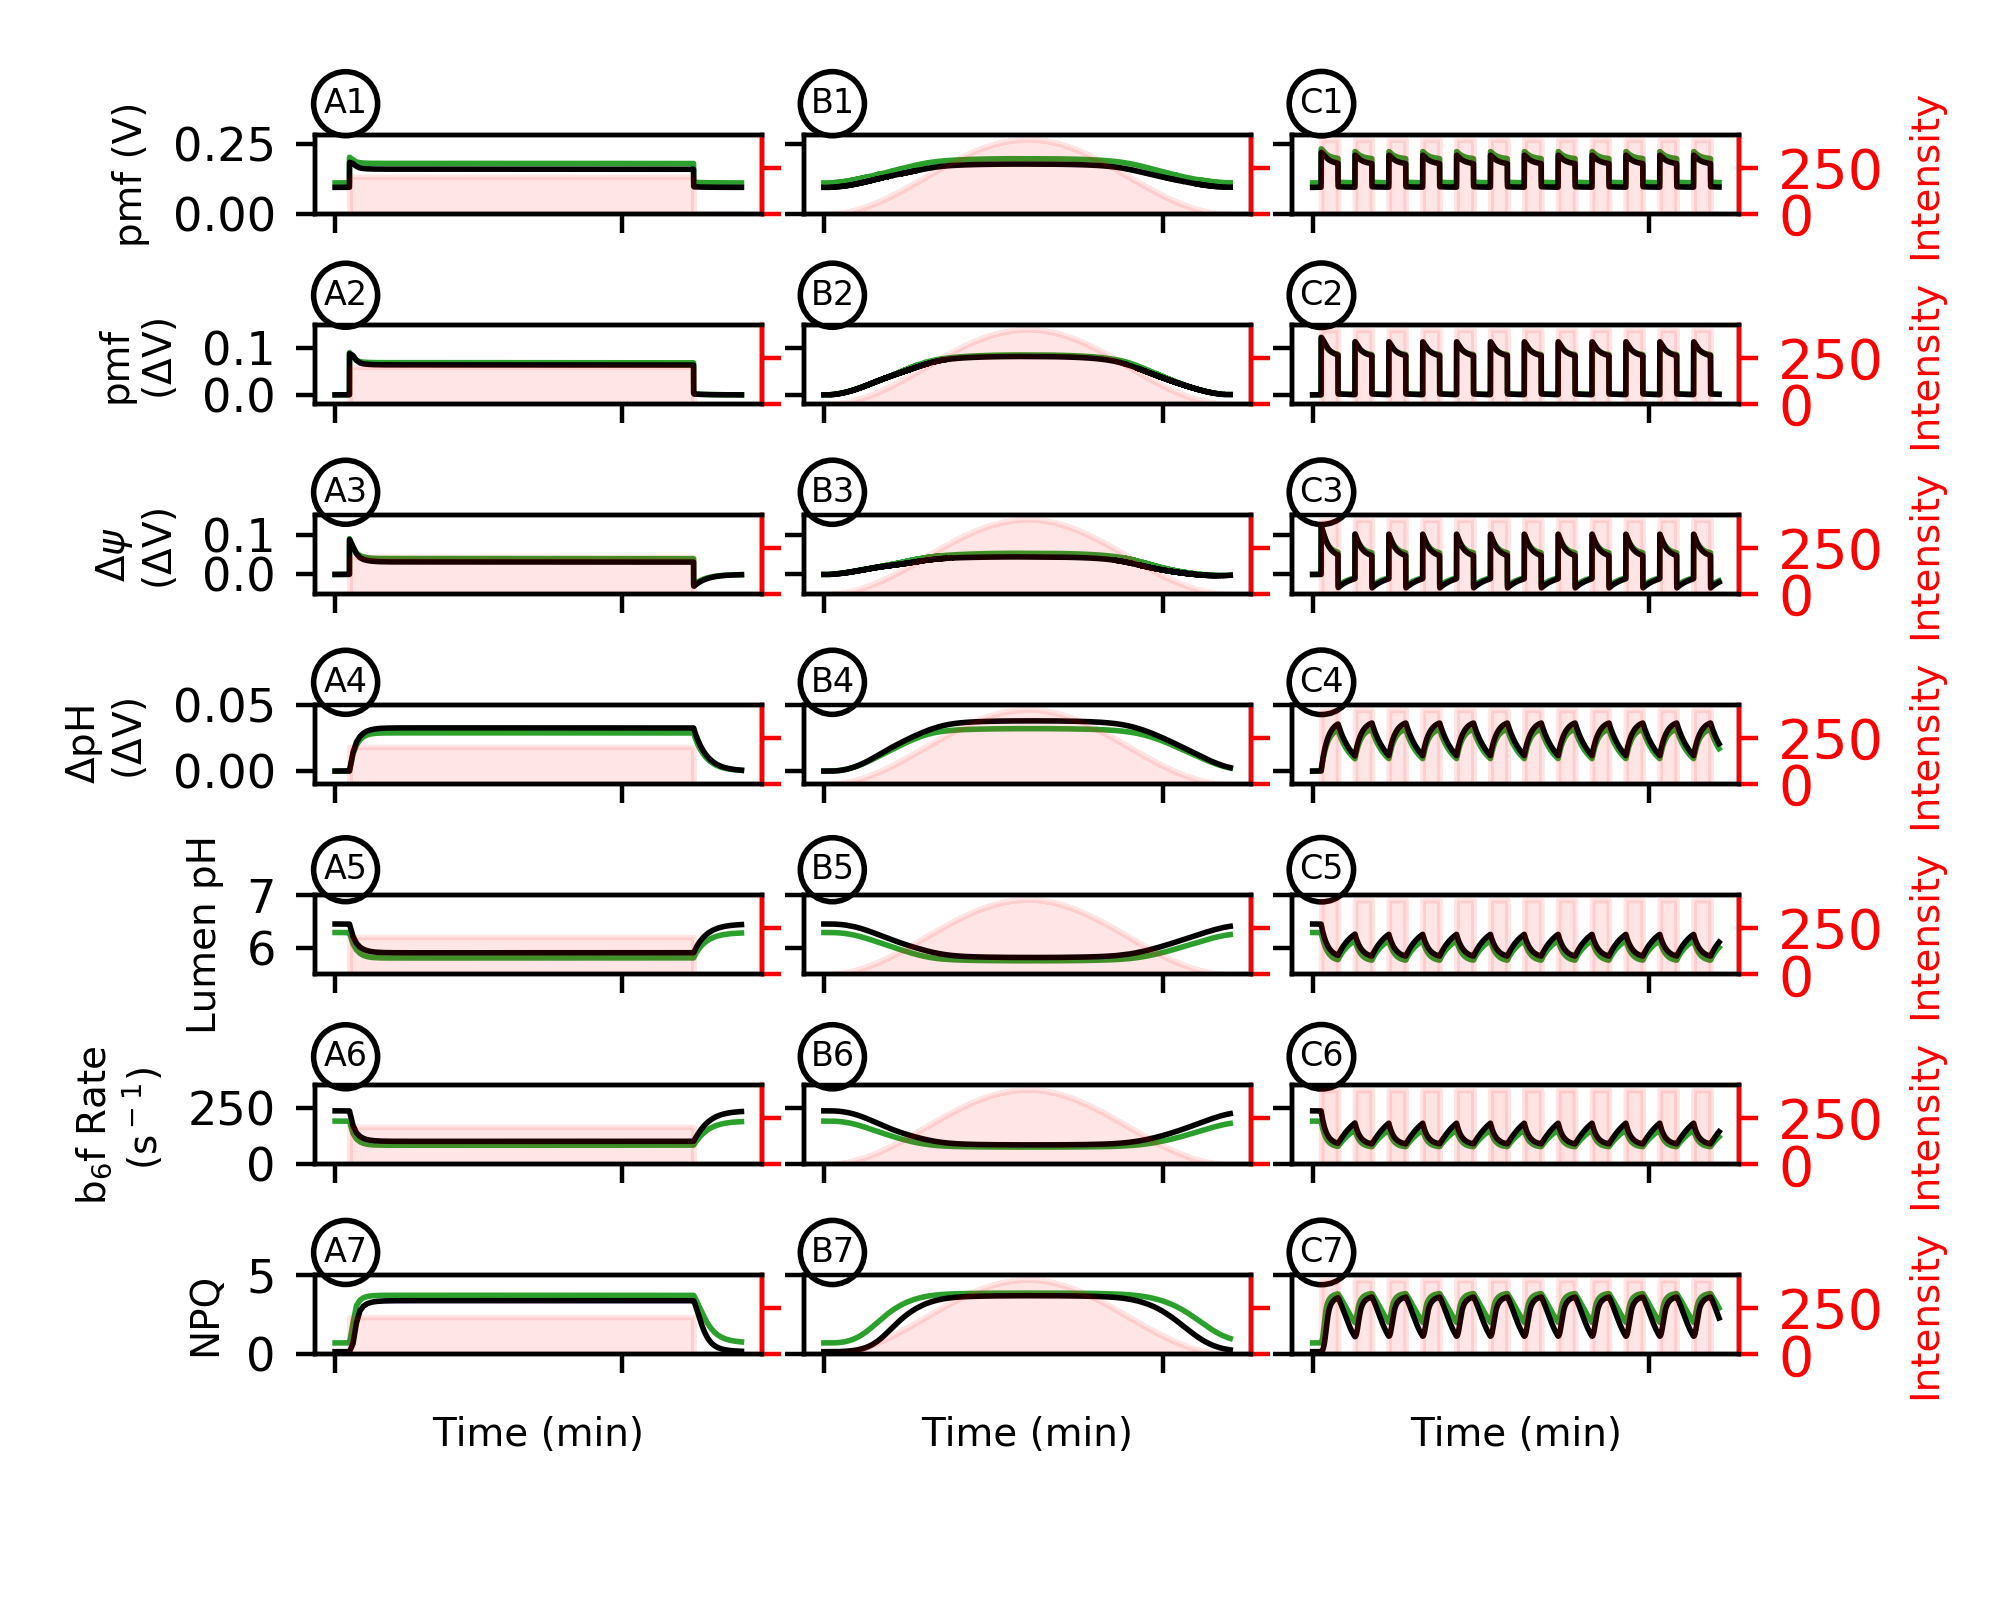

Simulated responses of the light reactions were performed as in Davis et al., 2017, with all standard conditions held constant except for the number of ATP synthase c-subunits. Simulations were performed using 1-hour of either static light (A), sinusoidal light (B), or square wave fluctuating light (C) with equal total photon flux over the total duration of each light treatment. Intervals of light excitation are indicated by shaded regions. (Panels 1-4) The light–induced pmf of ATP synthases with c–stoichiometries of 12 (green) or 14 (black) are shown in units of volts, so that a ΔpH of one is equivalent to 0.06 V. The total pmf (panel 2), Δψ (panel 3), and ΔpH (panel 4) are shown as light–induced changes relative to the pmf dark values indicated as ΔV from dark values, to emphasize light–induced ATP synthase constraints. (5) Light–induced changes in lumen pH due to photosynthetic activity. Light intensities and c–ring composition as in (1). (6) The relative rate constant for plastoqui

In [61]:
print('Supplemental Figure 4:  Altered ATP synthase c12 stoichiometry impacts pmf composition and pH–mediated '
      'regulatory processes during photosynthesis under increasingly dynamic light environments.')

fig = plt.figure('Supplemental Figure 4', figsize=(5,4), dpi=200)
ax1 = fig.add_subplot(8,3,1)
ax2 = fig.add_subplot(8,3,2)
ax3 = fig.add_subplot(8,3,3)
ax4 = fig.add_subplot(8,3,4)
ax5 = fig.add_subplot(8,3,5)
ax6 = fig.add_subplot(8,3,6)
ax7 = fig.add_subplot(8,3,7)
ax8 = fig.add_subplot(8,3,8)
ax9 = fig.add_subplot(8,3,9)
ax10 = fig.add_subplot(8,3,10)
ax11 = fig.add_subplot(8,3,11)
ax12 = fig.add_subplot(8,3,12)
ax13 = fig.add_subplot(8,3,13)
ax14 = fig.add_subplot(8,3,14)
ax15 = fig.add_subplot(8,3,15)
ax16 = fig.add_subplot(8,3,16)
ax17 = fig.add_subplot(8,3,17)
ax18 = fig.add_subplot(8,3,18)
ax19 = fig.add_subplot(8,3,19)
ax20 = fig.add_subplot(8,3,20)
ax21 = fig.add_subplot(8,3,21)

ax1b = ax1.twinx()
ax2b = ax2.twinx()
ax3b = ax3.twinx()
ax4b = ax4.twinx()
ax5b = ax5.twinx()
ax6b = ax6.twinx()
ax7b = ax7.twinx()
ax8b = ax8.twinx()
ax9b = ax9.twinx()
ax10b = ax10.twinx()
ax11b = ax11.twinx()
ax12b = ax12.twinx()
ax13b = ax13.twinx()
ax14b = ax14.twinx()
ax15b = ax15.twinx()
ax16b = ax16.twinx()
ax17b = ax17.twinx()
ax18b = ax18.twinx()
ax19b = ax19.twinx()
ax20b = ax20.twinx()
ax21b = ax21.twinx()

for key in output_dict:
    c=key.split('=')[1]
    if c == "12":
        if "single pulse 201.3umolE subunits" in str(key):
            ax1.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax4.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax7.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax10.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax13.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax16.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax19.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)

            
            ax1b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax4b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax7b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax10b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax13b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax16b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax19b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)        
        if "single sin wave 402.71umolE subunits" in str(key):
            ax2.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax5.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax8.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax11.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax14.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax17.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax20.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)

            
            ax2b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax5b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax8b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax11b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax14b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax17b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax20b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)        

        if "square wave 60 min max 400 light subunits" in str(key):
            ax3.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax6.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax9.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax12.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax15.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax18.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax21.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)

            
            ax3b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax6b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax9b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax12b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax15b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax18b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.11,zorder=2)
            ax21b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)        
    if c == "14":
        if "single pulse 201.3umolE subunits" in str(key):
            ax1.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax4.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax7.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax10.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax13.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax16.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax19.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
        if "single sin wave 402.71umolE subunits" in str(key):
            ax2.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax5.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax8.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax11.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax14.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax17.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax20.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
        if "square wave 60 min max 400 light subunits" in str(key):
            ax3.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax6.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax9.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax12.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax15.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax18.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax21.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)

ax1.set_ylabel('pmf (V)',fontsize=7)
ax4.set_ylabel('pmf\n ($\Delta$V)',fontsize=7)
ax7.set_ylabel('$\Delta$$\psi$\n ($\Delta$V)',fontsize=7)
ax10.set_ylabel('$\Delta$pH\n ($\Delta$V)',fontsize=7)
ax13.set_ylabel('Lumen pH',fontsize=7)
ax16.set_ylabel('b$_6$f Rate\n (s$^-$$^1$)',fontsize=7)
ax19.set_ylabel('NPQ',fontsize=7)
ax3b.set_ylabel('Intensity',fontsize=7)
ax6b.set_ylabel('Intensity',fontsize=7)
ax9b.set_ylabel('Intensity',fontsize=7)
ax12b.set_ylabel('Intensity',fontsize=7)
ax15b.set_ylabel('Intensity',fontsize=7)
ax18b.set_ylabel('Intensity',fontsize=7)
ax21b.set_ylabel('Intensity',fontsize=7)

axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18,
        ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,ax8b,ax9b,ax10b,ax11b,ax12b,ax13b,ax14b,ax15b,ax16b,
        ax17b,ax18b,ax19b,ax20b,ax21b]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.set_xticklabels([])
axes = [ax2,ax3,ax5,ax6,ax8,ax9,ax11,ax12,ax14,ax15,ax17,ax18,ax20,ax21,
        ax1b,ax2b,ax4b,ax5b,ax7b,ax8b,ax10b,ax11b,ax13b,ax14b,ax16b,ax17b,ax19b,ax20b]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.set_yticklabels([])
    
props = dict(boxstyle='circle', facecolor='white')
labels = ['A1','B1','C1']
axes = [ax1,ax2,ax3]
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .45, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=0, top=0.28)
axes = [ax4,ax5,ax6]
labels = ['A2','B2','C2']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .25, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.02, top=0.15)
axes = [ax7,ax8,ax9]
labels = ['A3','B3','C3']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .25, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.05, top=0.15)    
axes = [ax10,ax11,ax12]
labels = ['A4','B4','C4']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .08, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.01, top=0.05)
axes = [ax13,ax14,ax15]
labels = ['A5','B5','C5']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, 7.8, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=5.5, top=7)
axes = [ax16,ax17,ax18]
labels = ['A6','B6','C6']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, 550, label, fontsize=6,verticalalignment='top', bbox=props) 
    subplot.set_ylim(bottom=0, top=350)
axes = [ax19,ax20,ax21]
labels = ['A7','B7','C7']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, 7.5, label, fontsize=6,verticalalignment='top', bbox=props) 
    subplot.set_ylim(bottom=0, top=5)
    subplot.set_xlabel('Time (min)',fontsize=7)
    
axes = [ax1,ax4,ax7,ax10,ax13,ax16,ax19]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.tick_params(axis='y',labelsize='small')
    
axes = [ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,
        ax8b,ax9b,ax10b,ax11b,ax12b,ax13b,ax14b,
        ax15b,ax16b,ax17b,ax18b,ax19b,ax20b,ax21b]
for i in range(len(axes)):
    subplot = axes[i]
    subplot.set_ylim(bottom=0, top=425)
    subplot.yaxis.label.set_color('red')
    subplot.spines['right'].set_color('red')
    subplot.tick_params(axis='y', colors='red')
    if i not in [2,5,8,11,14,17,20]:
        subplot.set_yticklabels([])
        
plt.tight_layout(pad=1, w_pad=0.5, h_pad=0)
plt.show()
print('Simulated responses of the light reactions were performed as in Davis et al., 2017, with all standard '
      'conditions held constant except for the number of ATP synthase c-subunits. Simulations were performed using '
      '1-hour of either static light (A), sinusoidal light (B), or square wave fluctuating light (C) with equal '
      'total photon flux over the total duration of each light treatment. Intervals of light excitation are '
      'indicated by shaded regions. (Panels 1-4) The light–induced pmf of ATP synthases with c–stoichiometries of '
      '12 (green) or 14 (black) are shown in units of volts, so that a ΔpH of one is equivalent to 0.06 V. The '
      'total pmf (panel 2), Δψ (panel 3), and ΔpH (panel 4) are shown as light–induced changes relative to the pmf '
      'dark values indicated as ΔV from dark values, to emphasize light–induced ATP synthase constraints. (5) '
      'Light–induced changes in lumen pH due to photosynthetic activity. Light intensities and c–ring composition '
      'as in (1). (6) The relative rate constant for plastoquinol oxidation at the cytochrome b6f complex and (7) '
      'the extent of nonphotochemical quenching qE component for each c–ring size due to the light–induced changes '
      'in lumen pH.')

Supplemental Figure 5:  Altered ATP synthase c13 stoichiometry impacts pmf composition and pH–mediated regulatory processes during photosynthesis under increasingly dynamic light environments.


<IPython.core.display.Javascript object>


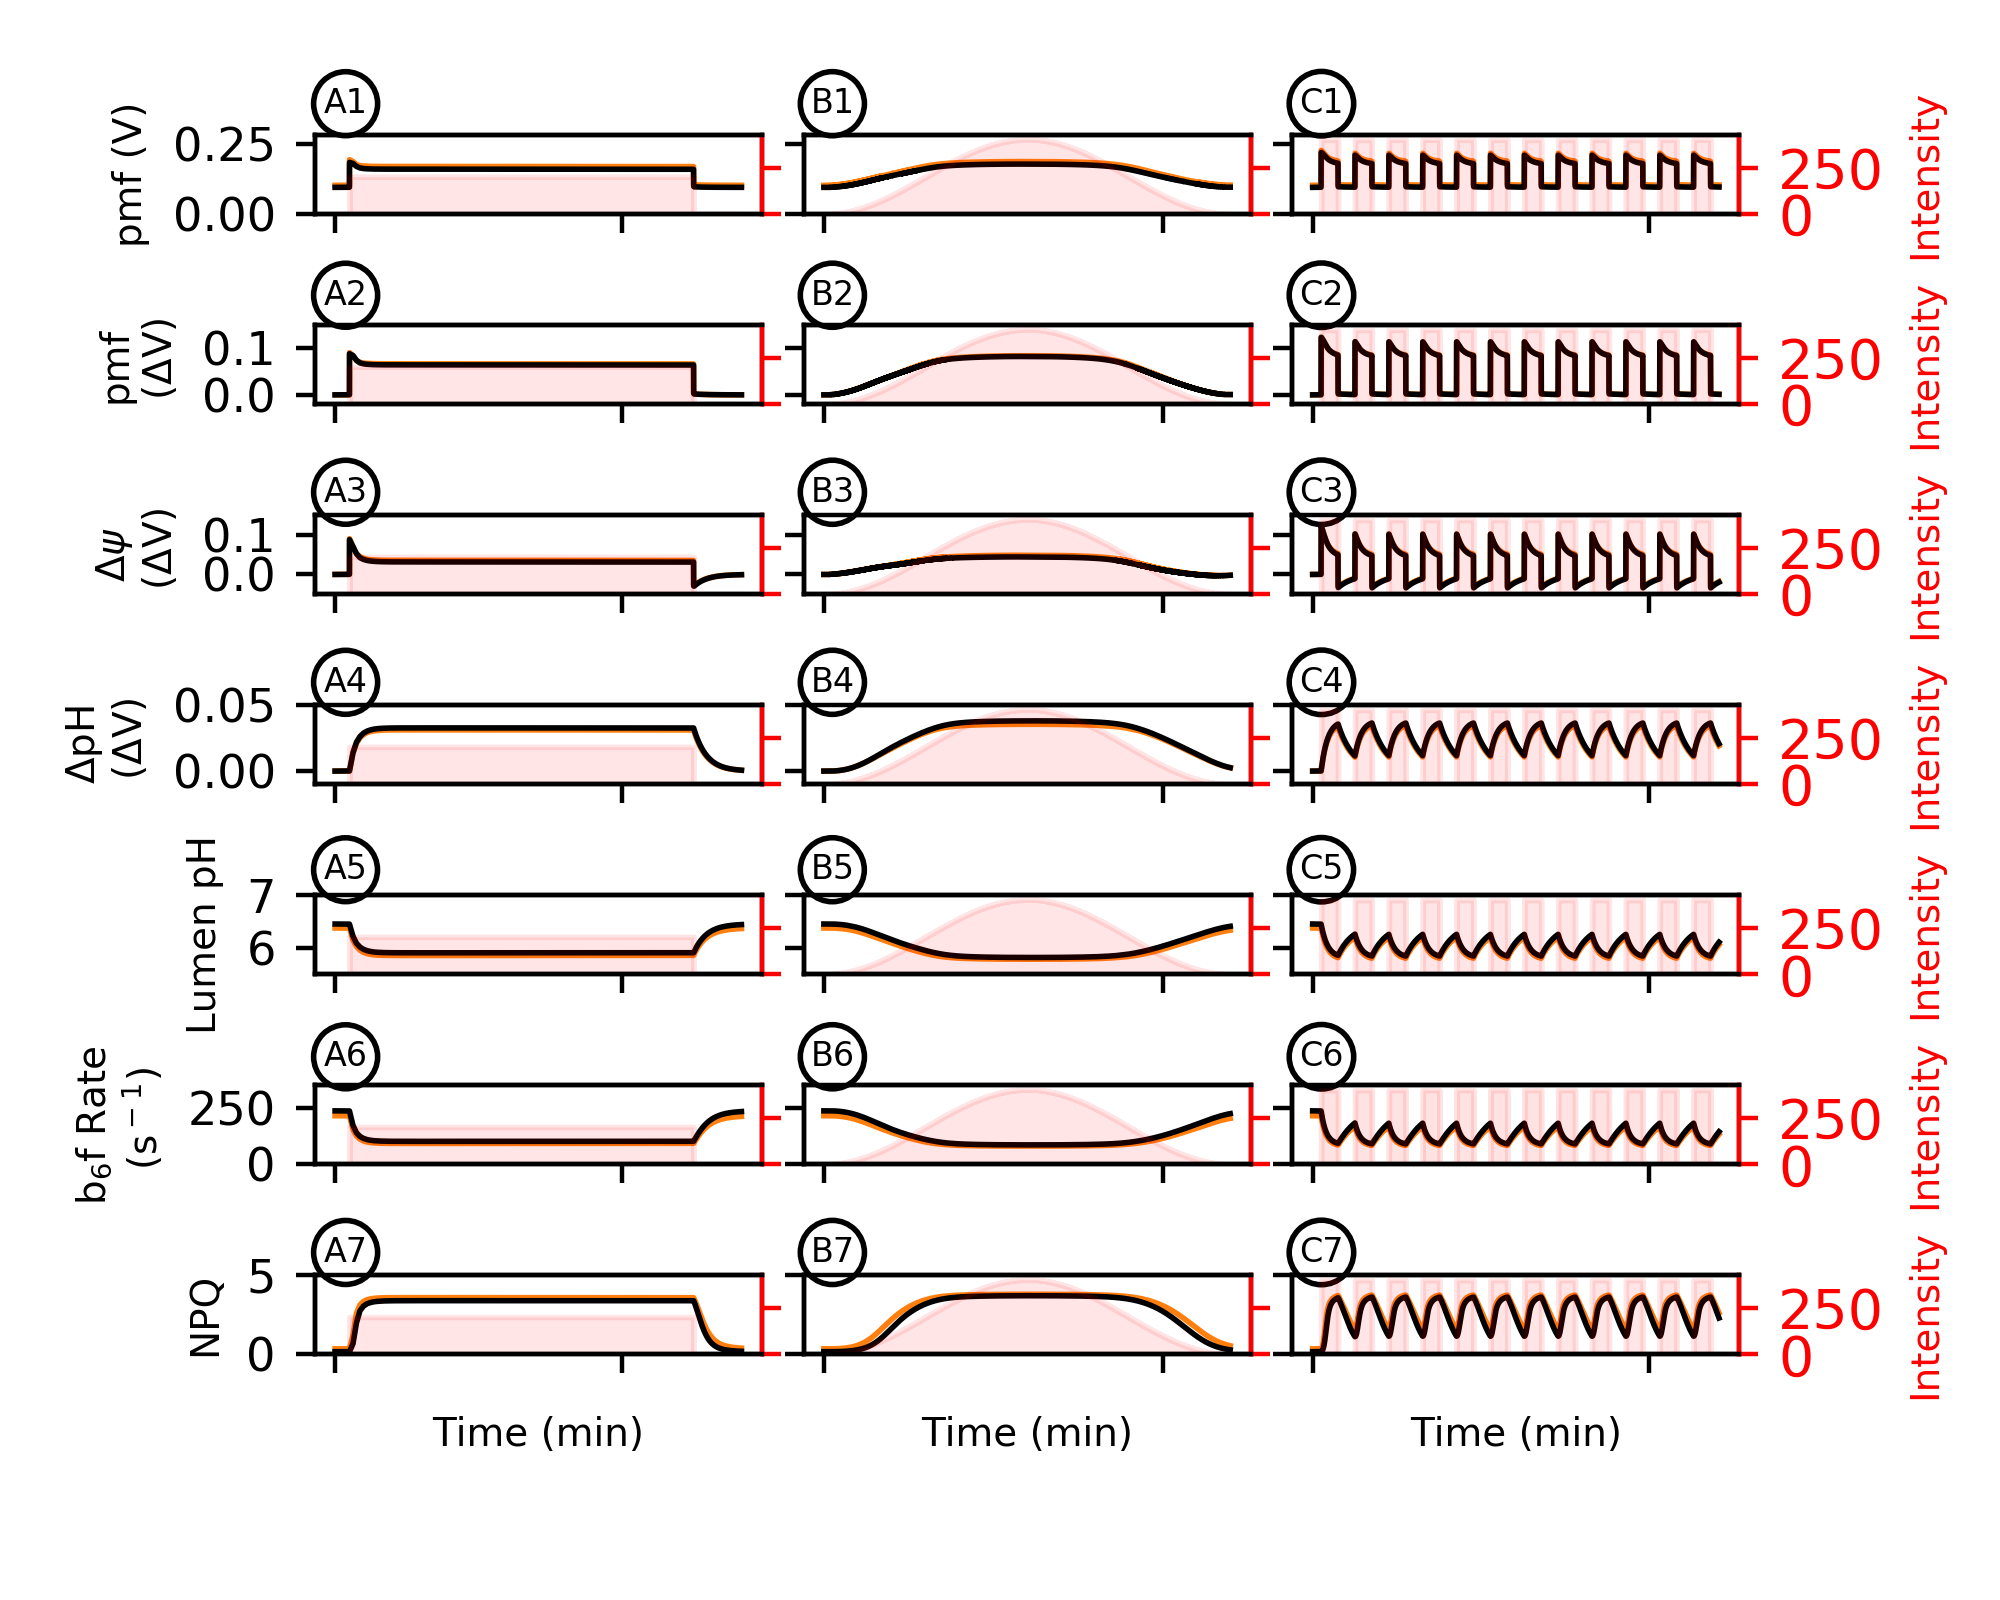

Simulated responses of the light reactions were performed as in Davis et al., 2017, with all standard conditions held constant except for the number of ATP synthase c-subunits. Simulations were performed using 1-hour of either static light (A), sinusoidal light (B), or square wave fluctuating light (C) with equal total photon flux over the total duration of each light treatment. Intervals of light excitation are indicated by shaded regions. (Panels 1-4) The light–induced pmf of ATP synthases with c–stoichiometries of 13 (orange) or 14 (black) are shown in units of volts, so that a ΔpH of one is equivalent to 0.06 V. The total pmf (panel 2), Δψ (panel 3), and ΔpH (panel 4) are shown as light–induced changes relative to the pmf dark values indicated as ΔV from dark values, to emphasize light–induced ATP synthase constraints. (5) Light–induced changes in lumen pH due to photosynthetic activity. Light intensities and c–ring composition as in (1). (6) The relative rate constant for plastoqu

In [64]:
print('Supplemental Figure 5:  Altered ATP synthase c13 stoichiometry impacts pmf composition and pH–mediated '
      'regulatory processes during photosynthesis under increasingly dynamic light environments.')

fig = plt.figure('Supplemental Figure 5', figsize=(5,4), dpi=200)
ax1 = fig.add_subplot(8,3,1)
ax2 = fig.add_subplot(8,3,2)
ax3 = fig.add_subplot(8,3,3)
ax4 = fig.add_subplot(8,3,4)
ax5 = fig.add_subplot(8,3,5)
ax6 = fig.add_subplot(8,3,6)
ax7 = fig.add_subplot(8,3,7)
ax8 = fig.add_subplot(8,3,8)
ax9 = fig.add_subplot(8,3,9)
ax10 = fig.add_subplot(8,3,10)
ax11 = fig.add_subplot(8,3,11)
ax12 = fig.add_subplot(8,3,12)
ax13 = fig.add_subplot(8,3,13)
ax14 = fig.add_subplot(8,3,14)
ax15 = fig.add_subplot(8,3,15)
ax16 = fig.add_subplot(8,3,16)
ax17 = fig.add_subplot(8,3,17)
ax18 = fig.add_subplot(8,3,18)
ax19 = fig.add_subplot(8,3,19)
ax20 = fig.add_subplot(8,3,20)
ax21 = fig.add_subplot(8,3,21)

ax1b = ax1.twinx()
ax2b = ax2.twinx()
ax3b = ax3.twinx()
ax4b = ax4.twinx()
ax5b = ax5.twinx()
ax6b = ax6.twinx()
ax7b = ax7.twinx()
ax8b = ax8.twinx()
ax9b = ax9.twinx()
ax10b = ax10.twinx()
ax11b = ax11.twinx()
ax12b = ax12.twinx()
ax13b = ax13.twinx()
ax14b = ax14.twinx()
ax15b = ax15.twinx()
ax16b = ax16.twinx()
ax17b = ax17.twinx()
ax18b = ax18.twinx()
ax19b = ax19.twinx()
ax20b = ax20.twinx()
ax21b = ax21.twinx()

for key in output_dict:
    c=key.split('=')[1]
    if c == "13":
        if "single pulse 201.3umolE subunits" in str(key):
            ax1.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax4.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax7.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax10.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax13.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax16.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax19.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)

            
            ax1b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax4b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax7b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax10b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax13b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax16b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax19b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)        
        if "single sin wave 402.71umolE subunits" in str(key):
            ax2.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax5.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax8.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax11.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax14.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax17.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax20.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)

            
            ax2b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax5b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax8b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax11b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax14b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax17b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax20b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)        

        if "square wave 60 min max 400 light subunits" in str(key):
            ax3.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax6.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax9.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax12.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax15.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax18.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax21.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)

            
            ax3b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax6b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax9b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax12b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax15b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax18b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.11,zorder=2)
            ax21b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)        
    if c == "14":
        if "single pulse 201.3umolE subunits" in str(key):
            ax1.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax4.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax7.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax10.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax13.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax16.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax19.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
        if "single sin wave 402.71umolE subunits" in str(key):
            ax2.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax5.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax8.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax11.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax14.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax17.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax20.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
        if "square wave 60 min max 400 light subunits" in str(key):
            ax3.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax6.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax9.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax12.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax15.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax18.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax21.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)

ax1.set_ylabel('pmf (V)',fontsize=7)
ax4.set_ylabel('pmf\n ($\Delta$V)',fontsize=7)
ax7.set_ylabel('$\Delta$$\psi$\n ($\Delta$V)',fontsize=7)
ax10.set_ylabel('$\Delta$pH\n ($\Delta$V)',fontsize=7)
ax13.set_ylabel('Lumen pH',fontsize=7)
ax16.set_ylabel('b$_6$f Rate\n (s$^-$$^1$)',fontsize=7)
ax19.set_ylabel('NPQ',fontsize=7)
ax3b.set_ylabel('Intensity',fontsize=7)
ax6b.set_ylabel('Intensity',fontsize=7)
ax9b.set_ylabel('Intensity',fontsize=7)
ax12b.set_ylabel('Intensity',fontsize=7)
ax15b.set_ylabel('Intensity',fontsize=7)
ax18b.set_ylabel('Intensity',fontsize=7)
ax21b.set_ylabel('Intensity',fontsize=7)

axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18,
        ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,ax8b,ax9b,ax10b,ax11b,ax12b,ax13b,ax14b,ax15b,
        ax16b,ax17b,ax18b,ax19b,ax20b,ax21b]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.set_xticklabels([])
axes = [ax2,ax3,ax5,ax6,ax8,ax9,ax11,ax12,ax14,ax15,ax17,ax18,ax20,ax21,
        ax1b,ax2b,ax4b,ax5b,ax7b,ax8b,ax10b,ax11b,ax13b,ax14b,ax16b,ax17b,ax19b,ax20b]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.set_yticklabels([])
    
props = dict(boxstyle='circle', facecolor='white')
labels = ['A1','B1','C1']
axes = [ax1,ax2,ax3]
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .45, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=0, top=0.28)
axes = [ax4,ax5,ax6]
labels = ['A2','B2','C2']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .25, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.02, top=0.15)
axes = [ax7,ax8,ax9]
labels = ['A3','B3','C3']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .25, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.05, top=0.15)    
axes = [ax10,ax11,ax12]
labels = ['A4','B4','C4']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .08, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.01, top=0.05)
axes = [ax13,ax14,ax15]
labels = ['A5','B5','C5']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, 7.8, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=5.5, top=7)
axes = [ax16,ax17,ax18]
labels = ['A6','B6','C6']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, 550, label, fontsize=6,verticalalignment='top', bbox=props) 
    subplot.set_ylim(bottom=0, top=350)
axes = [ax19,ax20,ax21]
labels = ['A7','B7','C7']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, 7.5, label, fontsize=6,verticalalignment='top', bbox=props) 
    subplot.set_ylim(bottom=0, top=5)
    subplot.set_xlabel('Time (min)',fontsize=7)
    
axes = [ax1,ax4,ax7,ax10,ax13,ax16,ax19]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.tick_params(axis='y',labelsize='small')
    
axes = [ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,
        ax8b,ax9b,ax10b,ax11b,ax12b,ax13b,ax14b,
        ax15b,ax16b,ax17b,ax18b,ax19b,ax20b,ax21b]
for i in range(len(axes)):
    subplot = axes[i]
    subplot.set_ylim(bottom=0, top=425)
    subplot.yaxis.label.set_color('red')
    subplot.spines['right'].set_color('red')
    subplot.tick_params(axis='y', colors='red')
    if i not in [2,5,8,11,14,17,20]:
        subplot.set_yticklabels([])
        
plt.tight_layout(pad=1, w_pad=0.5, h_pad=0)
plt.show()
print('Simulated responses of the light reactions were performed as in Davis et al., 2017, with all standard '
      'conditions held constant except for the number of ATP synthase c-subunits. Simulations were performed using '
      '1-hour of either static light (A), sinusoidal light (B), or square wave fluctuating light (C) with equal '
      'total photon flux over the total duration of each light treatment. Intervals of light excitation are '
      'indicated by shaded regions. (Panels 1-4) The light–induced pmf of ATP synthases with c–stoichiometries of '
      '13 (orange) or 14 (black) are shown in units of volts, so that a ΔpH of one is equivalent to 0.06 V. The '
      'total pmf (panel 2), Δψ (panel 3), and ΔpH (panel 4) are shown as light–induced changes relative to the pmf '
      'dark values indicated as ΔV from dark values, to emphasize light–induced ATP synthase constraints. (5) '
      'Light–induced changes in lumen pH due to photosynthetic activity. Light intensities and c–ring composition '
      'as in (1). (6) The relative rate constant for plastoquinol oxidation at the cytochrome b6f complex and (7) '
      'the extent of nonphotochemical quenching qE component for each c–ring size due to the light–induced changes '
      'in lumen pH.')

Supplemental Figure 6:  Altered ATP synthase c15 stoichiometry impacts pmf composition and pH–mediated regulatory processes during photosynthesis under increasingly dynamic light environments.


<IPython.core.display.Javascript object>


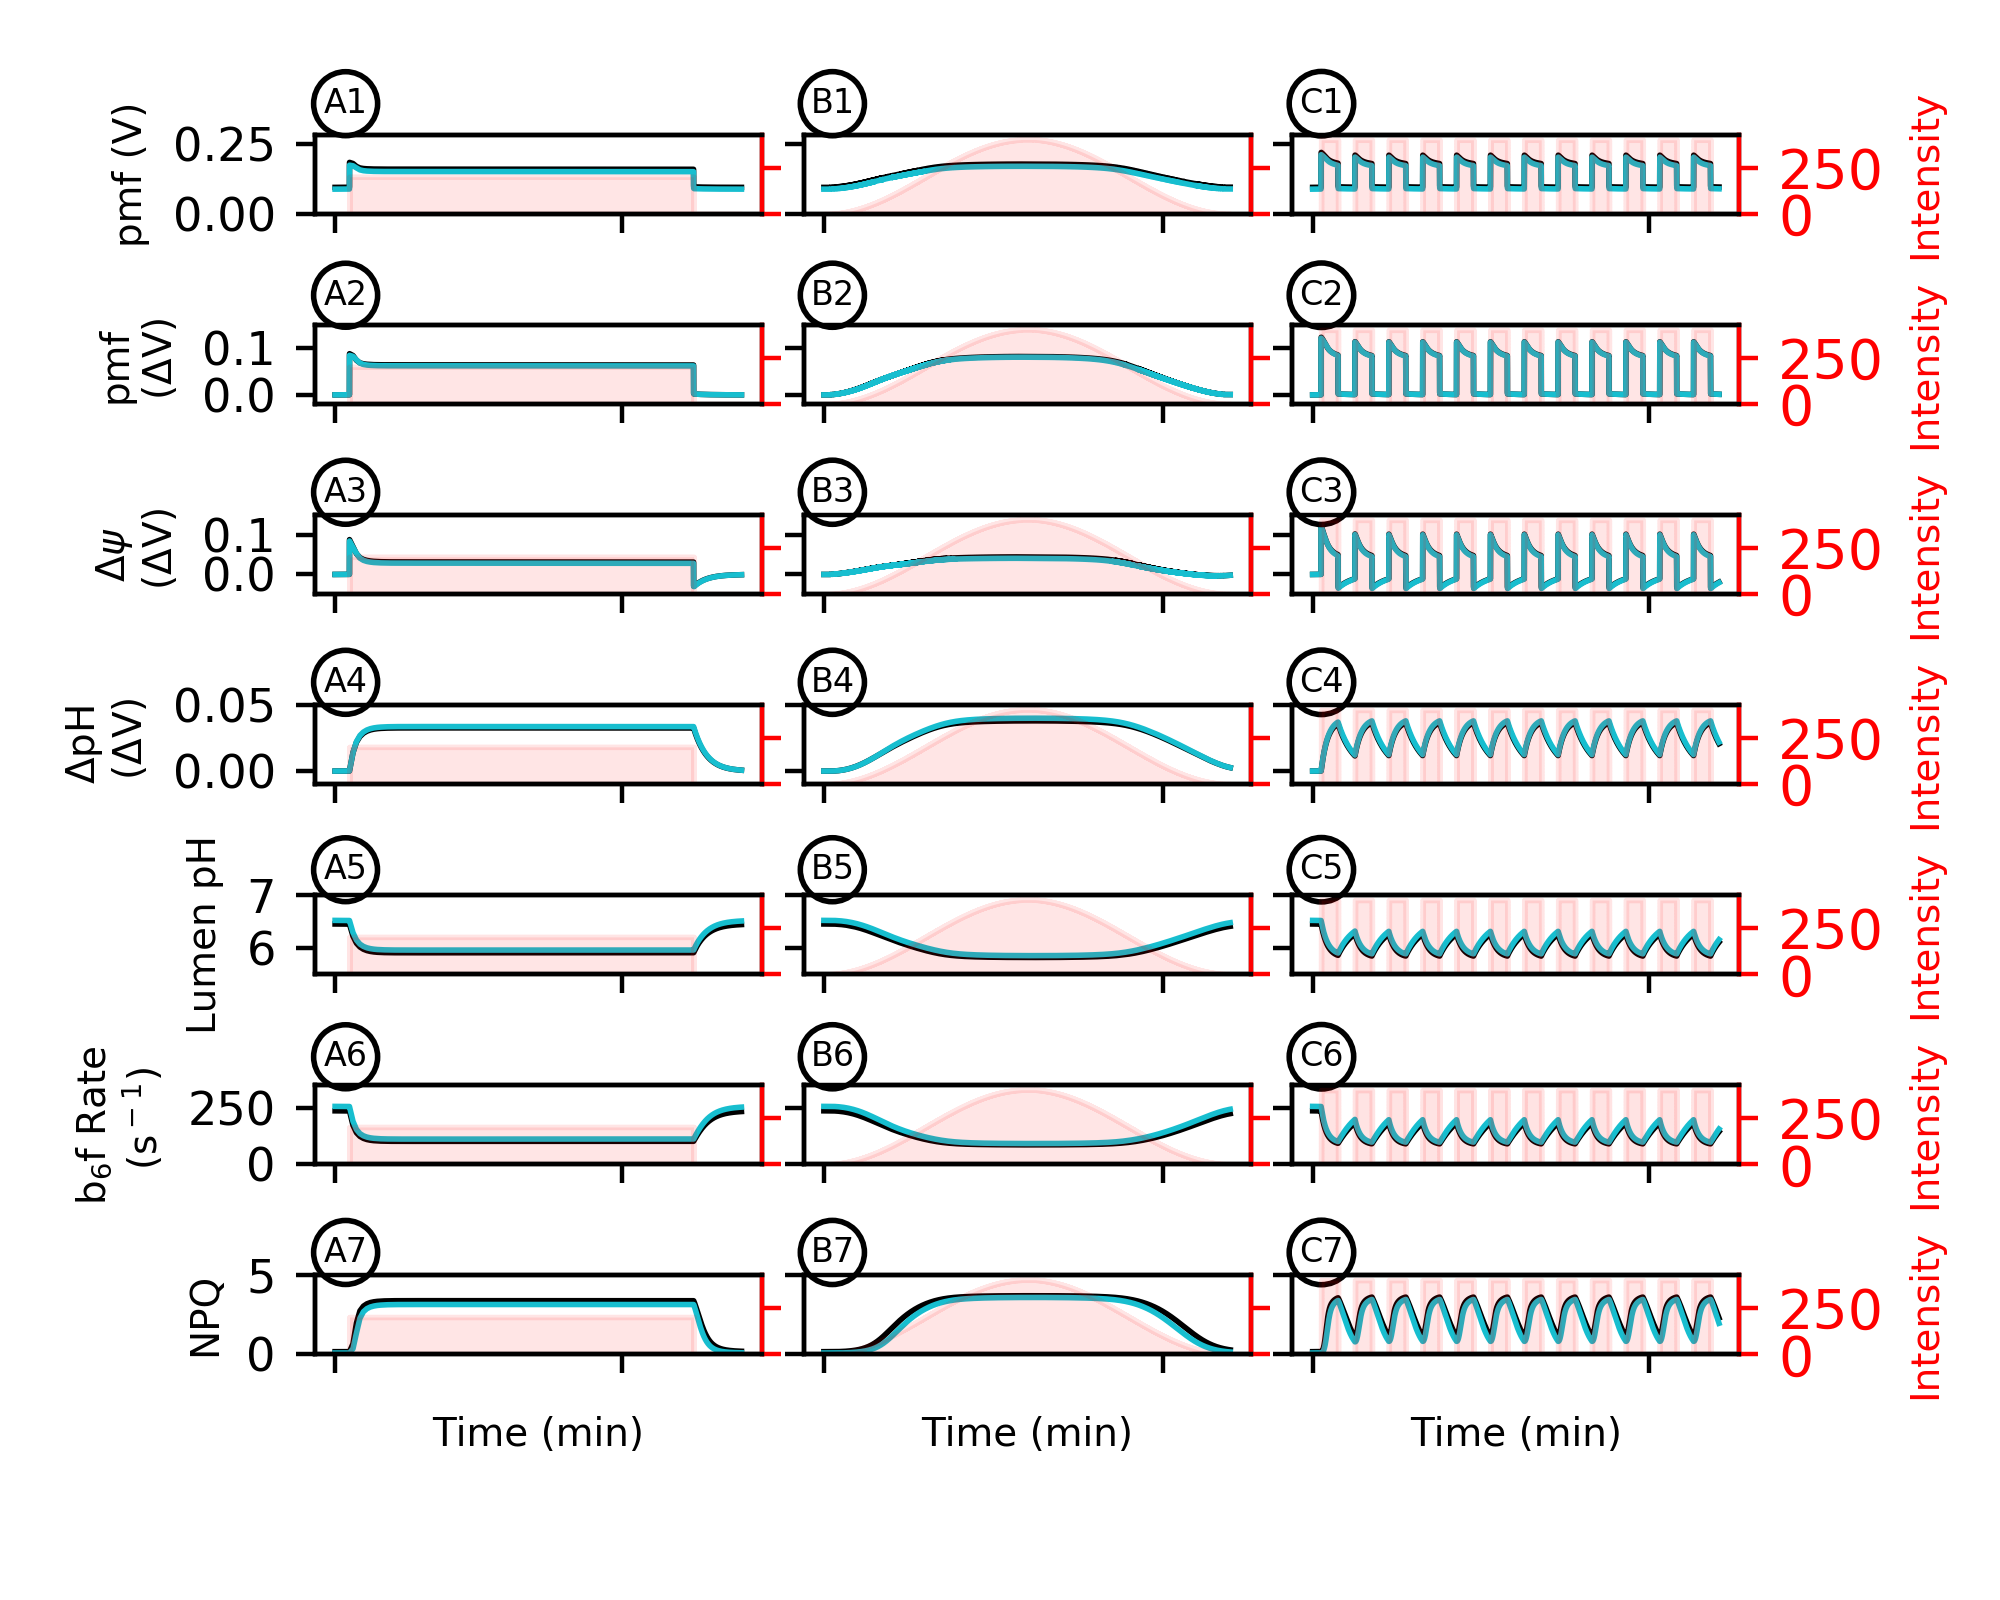

Simulated responses of the light reactions were performed as in Davis et al., 2017, with all standard conditions held constant except for the number of ATP synthase c-subunits. Simulations were performed using 1-hour of either static light (A), sinusoidal light (B), or square wave fluctuating light (C) with equal total photon flux over the total duration of each light treatment. Intervals of light excitation are indicated by shaded regions. (Panels 1-4) The light–induced pmf of ATP synthases with c–stoichiometries of 15 (cyan) or 14 (black) are shown in units of volts, so that a ΔpH of one is equivalent to 0.06 V. The total pmf (panel 2), Δψ (panel 3), and ΔpH (panel 4) are shown as light–induced changes relative to the pmf dark values indicated as ΔV from dark values, to emphasize light–induced ATP synthase constraints. (5) Light–induced changes in lumen pH due to photosynthetic activity. Light intensities and c–ring composition as in (1). (6) The relative rate constant for plastoquin

In [65]:
print('Supplemental Figure 6:  Altered ATP synthase c15 stoichiometry impacts pmf composition and pH–mediated '
      'regulatory processes during photosynthesis under increasingly dynamic light environments.')

fig = plt.figure('Supplemental Figure 6', figsize=(5,4), dpi=200)
ax1 = fig.add_subplot(8,3,1)
ax2 = fig.add_subplot(8,3,2)
ax3 = fig.add_subplot(8,3,3)
ax4 = fig.add_subplot(8,3,4)
ax5 = fig.add_subplot(8,3,5)
ax6 = fig.add_subplot(8,3,6)
ax7 = fig.add_subplot(8,3,7)
ax8 = fig.add_subplot(8,3,8)
ax9 = fig.add_subplot(8,3,9)
ax10 = fig.add_subplot(8,3,10)
ax11 = fig.add_subplot(8,3,11)
ax12 = fig.add_subplot(8,3,12)
ax13 = fig.add_subplot(8,3,13)
ax14 = fig.add_subplot(8,3,14)
ax15 = fig.add_subplot(8,3,15)
ax16 = fig.add_subplot(8,3,16)
ax17 = fig.add_subplot(8,3,17)
ax18 = fig.add_subplot(8,3,18)
ax19 = fig.add_subplot(8,3,19)
ax20 = fig.add_subplot(8,3,20)
ax21 = fig.add_subplot(8,3,21)

ax1b = ax1.twinx()
ax2b = ax2.twinx()
ax3b = ax3.twinx()
ax4b = ax4.twinx()
ax5b = ax5.twinx()
ax6b = ax6.twinx()
ax7b = ax7.twinx()
ax8b = ax8.twinx()
ax9b = ax9.twinx()
ax10b = ax10.twinx()
ax11b = ax11.twinx()
ax12b = ax12.twinx()
ax13b = ax13.twinx()
ax14b = ax14.twinx()
ax15b = ax15.twinx()
ax16b = ax16.twinx()
ax17b = ax17.twinx()
ax18b = ax18.twinx()
ax19b = ax19.twinx()
ax20b = ax20.twinx()
ax21b = ax21.twinx()

for key in output_dict:
    c=key.split('=')[1]
    if c == "15":
        if "single pulse 201.3umolE subunits" in str(key):
            ax1.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax4.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax7.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax10.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax13.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax16.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax19.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)

            
            ax1b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax4b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax7b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax10b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax13b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax16b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax19b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)        
        if "single sin wave 402.71umolE subunits" in str(key):
            ax2.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax5.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax8.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax11.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax14.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax17.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax20.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)

            
            ax2b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax5b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax8b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax11b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax14b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax17b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax20b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)        

        if "square wave 60 min max 400 light subunits" in str(key):
            ax3.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax6.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax9.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax12.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax15.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax18.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax21.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)

            
            ax3b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax6b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax9b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax12b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax15b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax18b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.11,zorder=2)
            ax21b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)        
    if c == "14":
        if "single pulse 201.3umolE subunits" in str(key):
            ax1.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax4.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax7.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax10.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax13.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax16.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax19.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
        if "single sin wave 402.71umolE subunits" in str(key):
            ax2.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax5.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax8.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax11.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax14.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax17.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax20.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
        if "square wave 60 min max 400 light subunits" in str(key):
            ax3.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax6.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax9.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax12.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax15.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax18.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax21.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)

ax1.set_ylabel('pmf (V)',fontsize=7)
ax4.set_ylabel('pmf\n ($\Delta$V)',fontsize=7)
ax7.set_ylabel('$\Delta$$\psi$\n ($\Delta$V)',fontsize=7)
ax10.set_ylabel('$\Delta$pH\n ($\Delta$V)',fontsize=7)
ax13.set_ylabel('Lumen pH',fontsize=7)
ax16.set_ylabel('b$_6$f Rate\n (s$^-$$^1$)',fontsize=7)
ax19.set_ylabel('NPQ',fontsize=7)
ax3b.set_ylabel('Intensity',fontsize=7)
ax6b.set_ylabel('Intensity',fontsize=7)
ax9b.set_ylabel('Intensity',fontsize=7)
ax12b.set_ylabel('Intensity',fontsize=7)
ax15b.set_ylabel('Intensity',fontsize=7)
ax18b.set_ylabel('Intensity',fontsize=7)
ax21b.set_ylabel('Intensity',fontsize=7)

axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18,
        ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,ax8b,ax9b,ax10b,ax11b,ax12b,ax13b,ax14b,ax15b,
        ax16b,ax17b,ax18b,ax19b,ax20b,ax21b]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.set_xticklabels([])
axes = [ax2,ax3,ax5,ax6,ax8,ax9,ax11,ax12,ax14,ax15,ax17,ax18,ax20,ax21,
        ax1b,ax2b,ax4b,ax5b,ax7b,ax8b,ax10b,ax11b,ax13b,ax14b,ax16b,ax17b,ax19b,ax20b]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.set_yticklabels([])
    
props = dict(boxstyle='circle', facecolor='white')
labels = ['A1','B1','C1']
axes = [ax1,ax2,ax3]
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .45, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=0, top=0.28)
axes = [ax4,ax5,ax6]
labels = ['A2','B2','C2']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .25, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.02, top=0.15)
axes = [ax7,ax8,ax9]
labels = ['A3','B3','C3']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .25, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.05, top=0.15)    
axes = [ax10,ax11,ax12]
labels = ['A4','B4','C4']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .08, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.01, top=0.05)
axes = [ax13,ax14,ax15]
labels = ['A5','B5','C5']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, 7.8, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=5.5, top=7)
axes = [ax16,ax17,ax18]
labels = ['A6','B6','C6']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, 550, label, fontsize=6,verticalalignment='top', bbox=props) 
    subplot.set_ylim(bottom=0, top=350)
axes = [ax19,ax20,ax21]
labels = ['A7','B7','C7']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, 7.5, label, fontsize=6,verticalalignment='top', bbox=props) 
    subplot.set_ylim(bottom=0, top=5)
    subplot.set_xlabel('Time (min)',fontsize=7)
    
axes = [ax1,ax4,ax7,ax10,ax13,ax16,ax19]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.tick_params(axis='y',labelsize='small')
    
axes = [ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,
        ax8b,ax9b,ax10b,ax11b,ax12b,ax13b,ax14b,
        ax15b,ax16b,ax17b,ax18b,ax19b,ax20b,ax21b]
for i in range(len(axes)):
    subplot = axes[i]
    subplot.set_ylim(bottom=0, top=425)
    subplot.yaxis.label.set_color('red')
    subplot.spines['right'].set_color('red')
    subplot.tick_params(axis='y', colors='red')
    if i not in [2,5,8,11,14,17,20]:
        subplot.set_yticklabels([])
        
plt.tight_layout(pad=1, w_pad=0.5, h_pad=0)
plt.show()
print('Simulated responses of the light reactions were performed as in Davis et al., 2017, with all standard '
      'conditions held constant except for the number of ATP synthase c-subunits. Simulations were performed using '
      '1-hour of either static light (A), sinusoidal light (B), or square wave fluctuating light (C) with equal '
      'total photon flux over the total duration of each light treatment. Intervals of light excitation are '
      'indicated by shaded regions. (Panels 1-4) The light–induced pmf of ATP synthases with c–stoichiometries of '
      '15 (cyan) or 14 (black) are shown in units of volts, so that a ΔpH of one is equivalent to 0.06 V. The total '
      'pmf (panel 2), Δψ (panel 3), and ΔpH (panel 4) are shown as light–induced changes relative to the pmf dark '
      'values indicated as ΔV from dark values, to emphasize light–induced ATP synthase constraints. (5) '
      'Light–induced changes in lumen pH due to photosynthetic activity. Light intensities and c–ring composition '
      'as in (1). (6) The relative rate constant for plastoquinol oxidation at the cytochrome b6f complex and (7) '
      'the extent of nonphotochemical quenching qE component for each c–ring size due to the light–induced changes '
      'in lumen pH.')

Supplemental Figure 7:  Altered ATP synthase c17 stoichiometry impacts pmf composition and pH–mediated regulatory processes during photosynthesis under increasingly dynamic light environments.


<IPython.core.display.Javascript object>


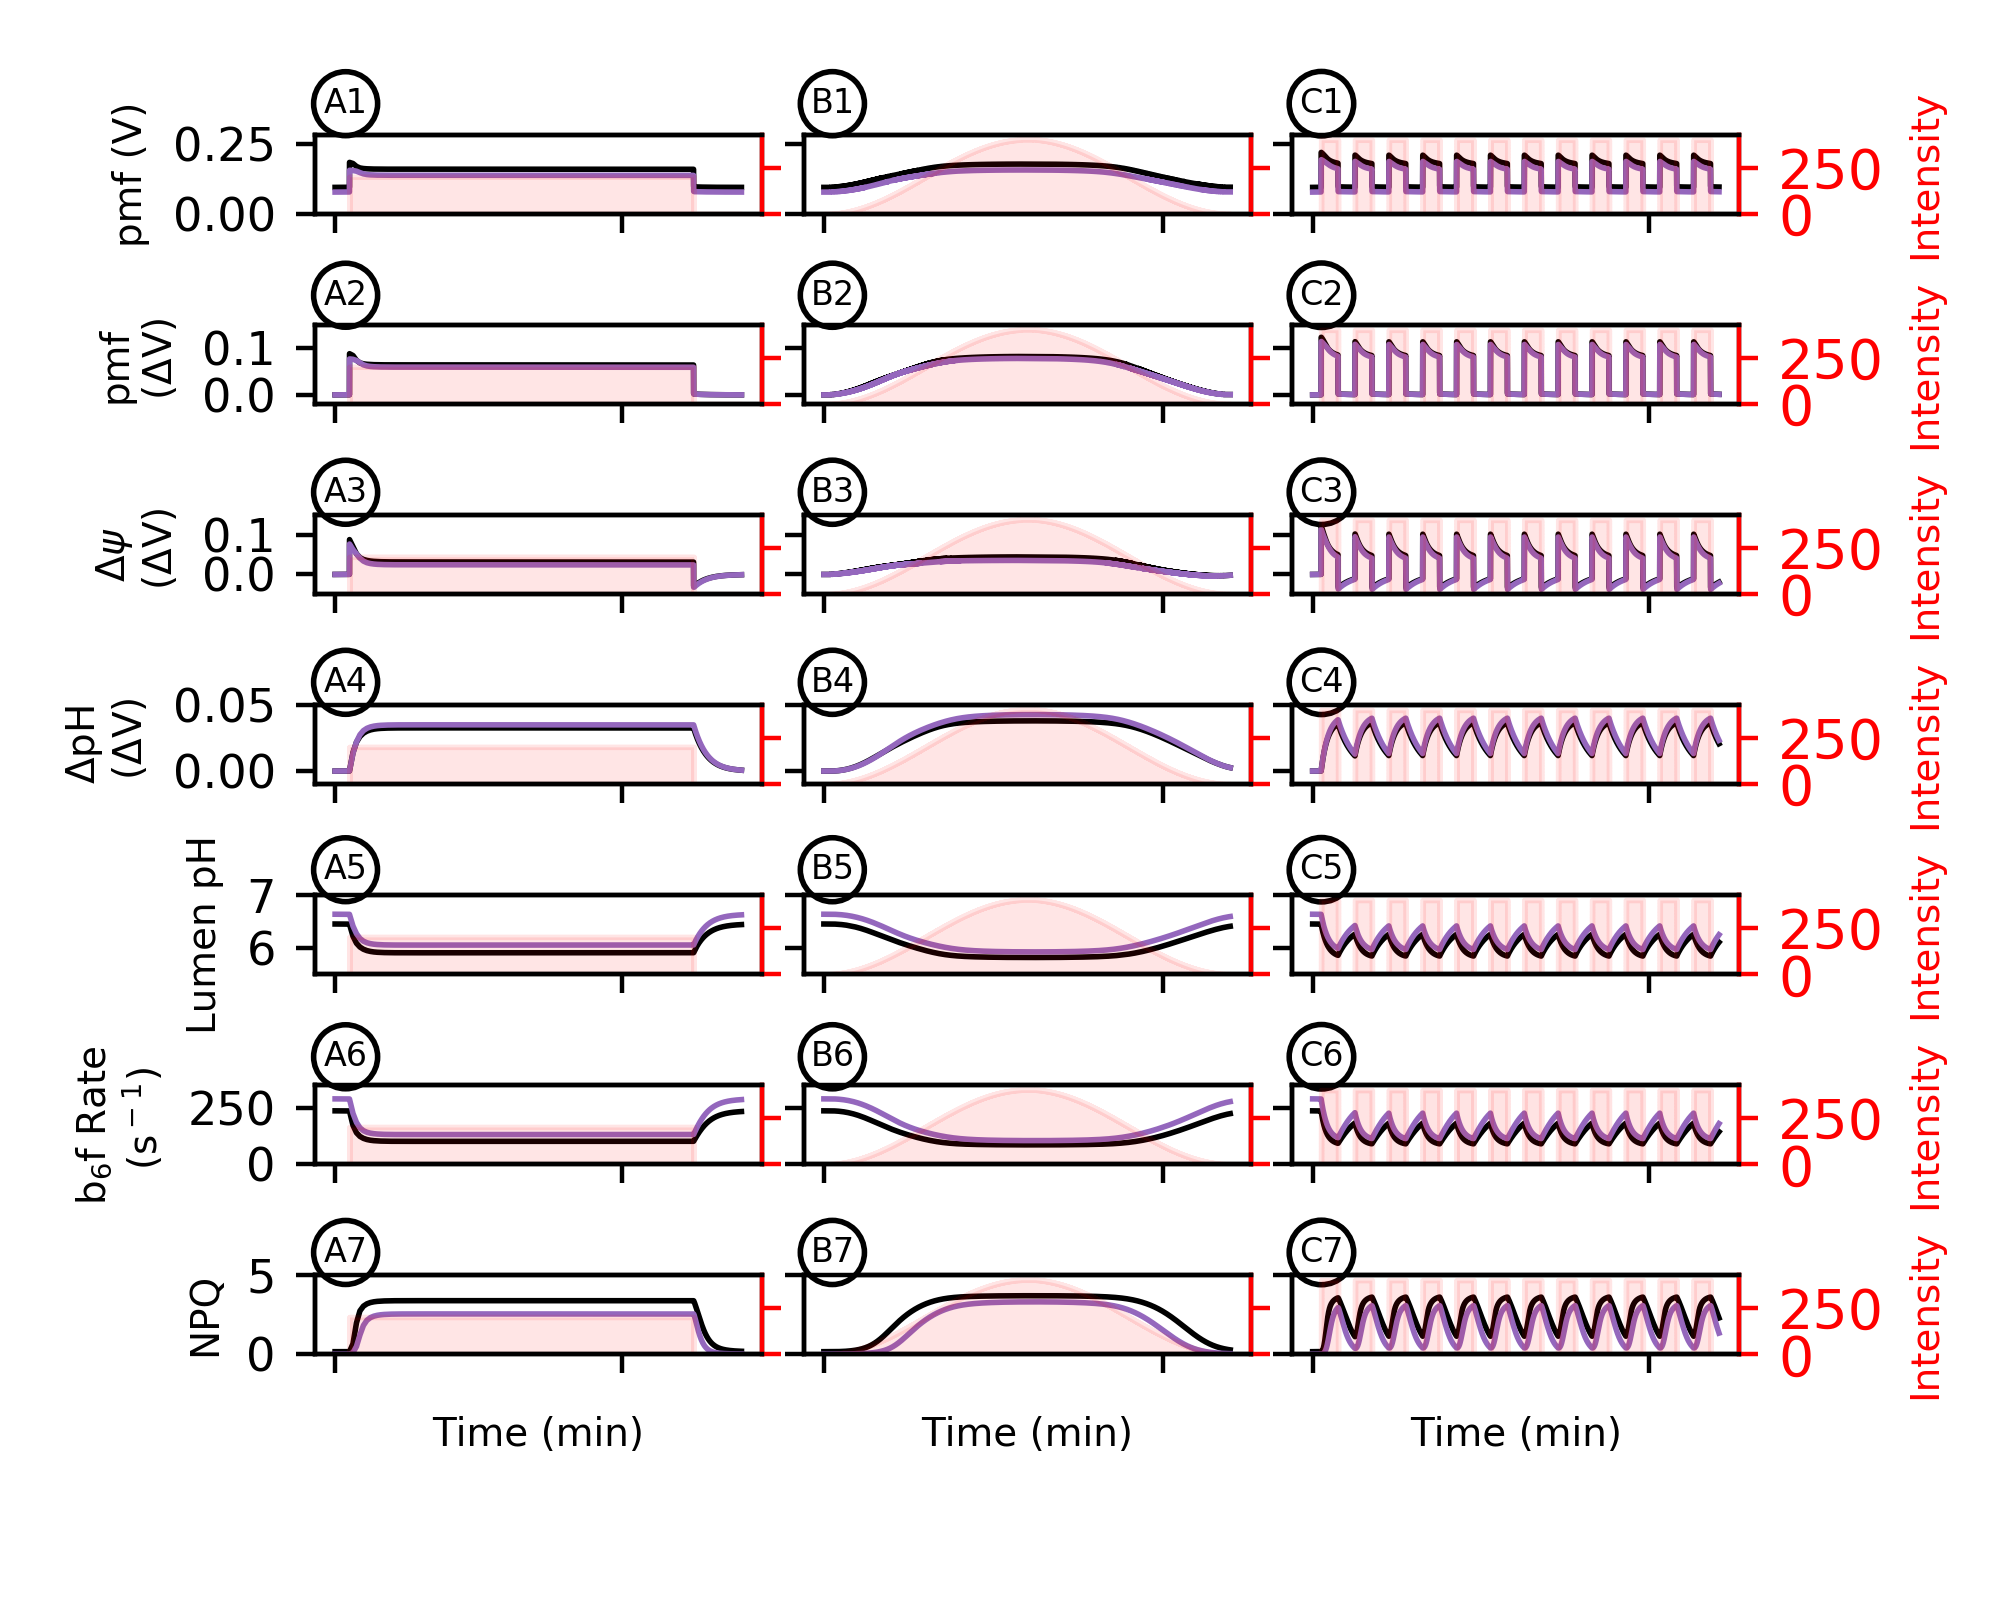

Simulated responses of the light reactions were performed as in Davis et al., 2017, with all standard conditions held constant except for the number of ATP synthase c-subunits. Simulations were performed using 1-hour of either static light (A), sinusoidal light (B), or square wave fluctuating light (C) with equal total photon flux over the total duration of each light treatment. Intervals of light excitation are indicated by shaded regions. (Panels 1-4) The light–induced pmf of ATP synthases with c–stoichiometries of 17 (purple) or 14 (black) are shown in units of volts, so that a ΔpH of one is equivalent to 0.06 V. The total pmf (panel 2), Δψ (panel 3), and ΔpH (panel 4) are shown as light–induced changes relative to the pmf dark values indicated as ΔV from dark values, to emphasize light–induced ATP synthase constraints. (5) Light–induced changes in lumen pH due to photosynthetic activity. Light intensities and c–ring composition as in (1). (6) The relative rate constant for plastoqu

In [66]:
print('Supplemental Figure 7:  Altered ATP synthase c17 stoichiometry impacts pmf composition and pH–mediated '
      'regulatory processes during photosynthesis under increasingly dynamic light environments.')

fig = plt.figure('Supplemental Figure 7', figsize=(5,4), dpi=200)
ax1 = fig.add_subplot(8,3,1)
ax2 = fig.add_subplot(8,3,2)
ax3 = fig.add_subplot(8,3,3)
ax4 = fig.add_subplot(8,3,4)
ax5 = fig.add_subplot(8,3,5)
ax6 = fig.add_subplot(8,3,6)
ax7 = fig.add_subplot(8,3,7)
ax8 = fig.add_subplot(8,3,8)
ax9 = fig.add_subplot(8,3,9)
ax10 = fig.add_subplot(8,3,10)
ax11 = fig.add_subplot(8,3,11)
ax12 = fig.add_subplot(8,3,12)
ax13 = fig.add_subplot(8,3,13)
ax14 = fig.add_subplot(8,3,14)
ax15 = fig.add_subplot(8,3,15)
ax16 = fig.add_subplot(8,3,16)
ax17 = fig.add_subplot(8,3,17)
ax18 = fig.add_subplot(8,3,18)
ax19 = fig.add_subplot(8,3,19)
ax20 = fig.add_subplot(8,3,20)
ax21 = fig.add_subplot(8,3,21)

ax1b = ax1.twinx()
ax2b = ax2.twinx()
ax3b = ax3.twinx()
ax4b = ax4.twinx()
ax5b = ax5.twinx()
ax6b = ax6.twinx()
ax7b = ax7.twinx()
ax8b = ax8.twinx()
ax9b = ax9.twinx()
ax10b = ax10.twinx()
ax11b = ax11.twinx()
ax12b = ax12.twinx()
ax13b = ax13.twinx()
ax14b = ax14.twinx()
ax15b = ax15.twinx()
ax16b = ax16.twinx()
ax17b = ax17.twinx()
ax18b = ax18.twinx()
ax19b = ax19.twinx()
ax20b = ax20.twinx()
ax21b = ax21.twinx()

for key in output_dict:
    c=key.split('=')[1]
    if c == "17":
        if "single pulse 201.3umolE subunits" in str(key):
            ax1.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax4.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax7.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax10.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax13.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax16.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax19.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)

            
            ax1b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax4b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax7b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax10b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax13b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax16b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax19b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)        
        if "single sin wave 402.71umolE subunits" in str(key):
            ax2.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax5.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax8.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax11.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax14.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax17.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax20.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)

            
            ax2b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax5b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax8b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax11b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax14b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax17b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax20b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)        

        if "square wave 60 min max 400 light subunits" in str(key):
            ax3.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax6.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax9.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax12.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax15.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax18.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax21.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)

            
            ax3b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax6b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax9b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.1,zorder=2)
            ax12b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax15b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)
            ax18b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.11,zorder=2)
            ax21b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                               color='red', alpha=0.1,zorder=2)        
    if c == "14":
        if "single pulse 201.3umolE subunits" in str(key):
            ax1.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax4.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax7.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax10.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax13.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax16.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax19.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
        if "single sin wave 402.71umolE subunits" in str(key):
            ax2.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax5.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax8.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax11.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax14.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax17.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax20.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
        if "square wave 60 min max 400 light subunits" in str(key):
            ax3.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax6.plot(output_dict[key]['time_axis']/60,output_dict[key]['pmf_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax9.plot(output_dict[key]['time_axis']/60,output_dict[key]['Dy_offset'], 
                     color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax12.plot(output_dict[key]['time_axis']/60,output_dict[key]['delta_pH_V_offset'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax15.plot(output_dict[key]['time_axis']/60,output_dict[key]['pHlumen'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax18.plot(output_dict[key]['time_axis']/60,output_dict[key]['b6f_control'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)
            ax21.plot(output_dict[key]['time_axis']/60,output_dict[key]['NPQ_array'], 
                      color=set_of_c_stoichiometries[int(c)],linewidth=1)

ax1.set_ylabel('pmf (V)',fontsize=7)
ax4.set_ylabel('pmf\n ($\Delta$V)',fontsize=7)
ax7.set_ylabel('$\Delta$$\psi$\n ($\Delta$V)',fontsize=7)
ax10.set_ylabel('$\Delta$pH\n ($\Delta$V)',fontsize=7)
ax13.set_ylabel('Lumen pH',fontsize=7)
ax16.set_ylabel('b$_6$f Rate\n (s$^-$$^1$)',fontsize=7)
ax19.set_ylabel('NPQ',fontsize=7)
ax3b.set_ylabel('Intensity',fontsize=7)
ax6b.set_ylabel('Intensity',fontsize=7)
ax9b.set_ylabel('Intensity',fontsize=7)
ax12b.set_ylabel('Intensity',fontsize=7)
ax15b.set_ylabel('Intensity',fontsize=7)
ax18b.set_ylabel('Intensity',fontsize=7)
ax21b.set_ylabel('Intensity',fontsize=7)

axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18,
        ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,ax8b,ax9b,ax10b,ax11b,ax12b,ax13b,ax14b,ax15b,
        ax16b,ax17b,ax18b,ax19b,ax20b,ax21b]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.set_xticklabels([])
axes = [ax2,ax3,ax5,ax6,ax8,ax9,ax11,ax12,ax14,ax15,ax17,ax18,ax20,ax21,
        ax1b,ax2b,ax4b,ax5b,ax7b,ax8b,ax10b,ax11b,ax13b,ax14b,ax16b,ax17b,ax19b,ax20b]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.set_yticklabels([])
    
props = dict(boxstyle='circle', facecolor='white')
labels = ['A1','B1','C1']
axes = [ax1,ax2,ax3]
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .45, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=0, top=0.28)
axes = [ax4,ax5,ax6]
labels = ['A2','B2','C2']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .25, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.02, top=0.15)
axes = [ax7,ax8,ax9]
labels = ['A3','B3','C3']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .25, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.05, top=0.15)    
axes = [ax10,ax11,ax12]
labels = ['A4','B4','C4']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, .08, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=-0.01, top=0.05)
axes = [ax13,ax14,ax15]
labels = ['A5','B5','C5']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, 7.8, label, fontsize=6,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=5.5, top=7)
axes = [ax16,ax17,ax18]
labels = ['A6','B6','C6']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, 550, label, fontsize=6,verticalalignment='top', bbox=props) 
    subplot.set_ylim(bottom=0, top=350)
axes = [ax19,ax20,ax21]
labels = ['A7','B7','C7']
for i in range(len(axes)):
    subplot=axes[i]
    label=labels[i]
    subplot.text(-2, 7.5, label, fontsize=6,verticalalignment='top', bbox=props) 
    subplot.set_ylim(bottom=0, top=5)
    subplot.set_xlabel('Time (min)',fontsize=7)
    
axes = [ax1,ax4,ax7,ax10,ax13,ax16,ax19]
for i in range(len(axes)):
    subplot=axes[i]
    subplot.tick_params(axis='y',labelsize='small')
    
axes = [ax1b,ax2b,ax3b,ax4b,ax5b,ax6b,ax7b,
        ax8b,ax9b,ax10b,ax11b,ax12b,ax13b,ax14b,
        ax15b,ax16b,ax17b,ax18b,ax19b,ax20b,ax21b]
for i in range(len(axes)):
    subplot = axes[i]
    subplot.set_ylim(bottom=0, top=425)
    subplot.yaxis.label.set_color('red')
    subplot.spines['right'].set_color('red')
    subplot.tick_params(axis='y', colors='red')
    if i not in [2,5,8,11,14,17,20]:
        subplot.set_yticklabels([])
        
plt.tight_layout(pad=1, w_pad=0.5, h_pad=0)
plt.show()
print('Simulated responses of the light reactions were performed as in Davis et al., 2017, with all standard '
      'conditions held constant except for the number of ATP synthase c-subunits. Simulations were performed using '
      '1-hour of either static light (A), sinusoidal light (B), or square wave fluctuating light (C) with equal '
      'total photon flux over the total duration of each light treatment. Intervals of light excitation are '
      'indicated by shaded regions. (Panels 1-4) The light–induced pmf of ATP synthases with c–stoichiometries of '
      '17 (purple) or 14 (black) are shown in units of volts, so that a ΔpH of one is equivalent to 0.06 V. The '
      'total pmf (panel 2), Δψ (panel 3), and ΔpH (panel 4) are shown as light–induced changes relative to the pmf '
      'dark values indicated as ΔV from dark values, to emphasize light–induced ATP synthase constraints. (5) '
      'Light–induced changes in lumen pH due to photosynthetic activity. Light intensities and c–ring composition '
      'as in (1). (6) The relative rate constant for plastoquinol oxidation at the cytochrome b6f complex and (7) '
      'the extent of nonphotochemical quenching qE component for each c–ring size due to the light–induced changes '
      'in lumen pH.')

Figure 4: Altered pmf composition due to c-subunit stoichiometry limits photosynthetic productivity.


<IPython.core.display.Javascript object>


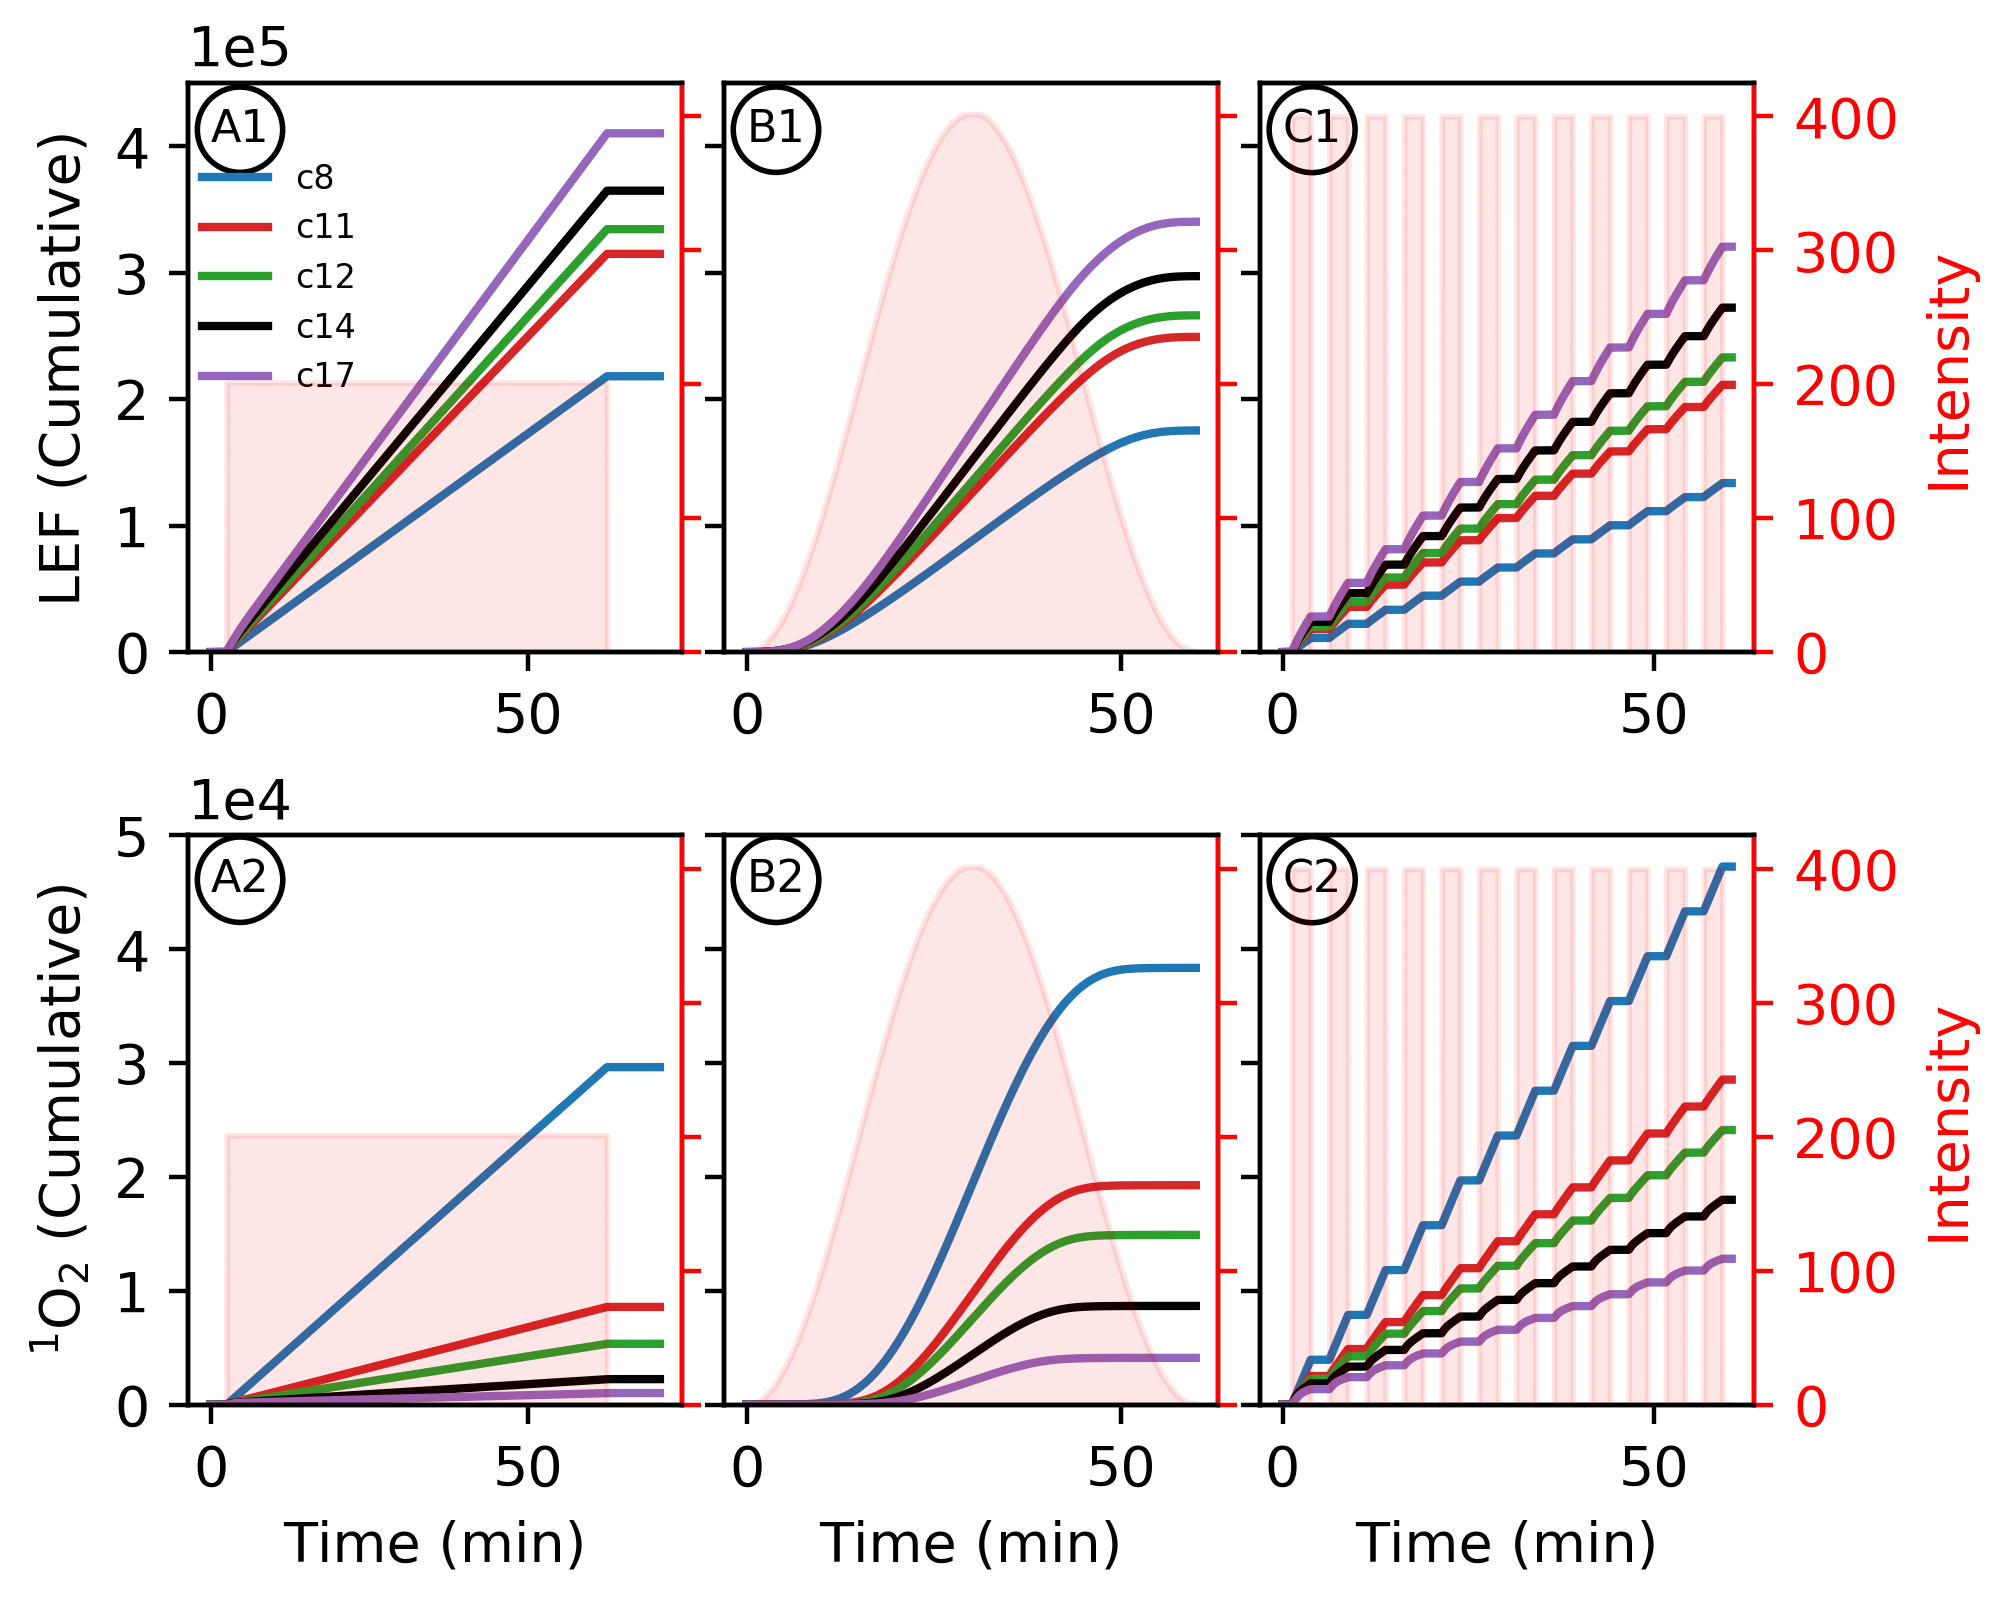

Simulated responses of the light reactions were performed as in figure 3. Variability in environment was simulated with 1-hour light profiles of static light (A1, 2), sinusoidal light (B1, 2), or square wave fluctuating light (C1, 2) to provide the same total illumination during the simulation. (1) The total outputs for linear electron flow (LEF) over the course of the light simulations and (2) 1O2 were integrated over the light treatment to give the cumulative totals. Shaded regions indicate the light profiles for each simulation. 


In [67]:
print('Figure 4: Altered pmf composition due to c-subunit stoichiometry limits photosynthetic productivity.')

fig = plt.figure('Figure 4', figsize=(5,4), dpi=200)
ax1 = fig.add_subplot(231)
ax1b = ax1.twinx()
ax2 = fig.add_subplot(232)
ax2b = ax2.twinx()
ax3 = fig.add_subplot(233)
ax3b = ax3.twinx()
ax4 = fig.add_subplot(234)
ax4b = ax4.twinx()
ax5 = fig.add_subplot(235)
ax5b = ax5.twinx()
ax6 = fig.add_subplot(236)
ax6b = ax6.twinx()

for key in output_dict:
    c=key.split('=')[1]
    if c == "8" or c== "11" or c=='12' or c== "14" or c=="17":
        if "single pulse 201.3umolE subunits" in str(key):
            ax1.plot(output_dict[key]['time_axis']/60,output_dict[key]['LEF_cumulative'], 
                     color=set_of_c_stoichiometries[int(c)], label="c"+str(c))
            ax1b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.02,zorder=2)
            ax4.plot(output_dict[key]['time_axis']/60,output_dict[key]['singletO2_array'], 
                     color=set_of_c_stoichiometries[int(c)])
            ax4b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.02,zorder=2)
        if "single sin wave 402.71umolE subunits" in str(key):
            ax2.plot(output_dict[key]['time_axis']/60,output_dict[key]['LEF_cumulative'], 
                     color=set_of_c_stoichiometries[int(c)], label=str(c))
            ax2b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.02,zorder=2)
            ax5.plot(output_dict[key]['time_axis']/60,output_dict[key]['singletO2_array'], 
                     color=set_of_c_stoichiometries[int(c)])
            ax5b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.02,zorder=2)
        if "square wave 60 min max 400 light subunits" in str(key):
            ax3.plot(output_dict[key]['time_axis']/60,output_dict[key]['LEF_cumulative'], 
                     color=set_of_c_stoichiometries[int(c)])
            ax3b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.02,zorder=2)
            ax6.plot(output_dict[key]['time_axis']/60,output_dict[key]['singletO2_array'], 
                     color=set_of_c_stoichiometries[int(c)])
            ax6b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                              color='red', alpha=0.02,zorder=2)

        
ax1.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax2.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax3.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax4.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax5.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax6.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

props = dict(boxstyle='circle', facecolor='white')

axes = [ax1,ax2,ax3]
labels = ['A1','B1','C1']
axes_labels = ['LEF (Cumulative)','','']
for i in range(len(axes)):
    subplot = axes[i]
    label = labels[i]
    y_label = axes_labels[i]
    subplot.text(0, 430000, label, fontsize=8,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=0, top=450000)
    subplot.set_ylabel(y_label)
    if i != 0:
        subplot.set_yticklabels([])

axes = [ax4,ax5,ax6]
labels = ['A2','B2','C2']
axes_labels = [r'$^1$O$_2$ (Cumulative)','','']
for i in range(len(axes)):
    subplot = axes[i]
    label = labels[i]
    y_label = axes_labels[i]
    subplot.text(0, 48000, label, fontsize=8,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=0, top=50000)
    subplot.set_xlabel('Time (min)')
    subplot.set_ylabel(y_label)
    if i != 0:
        subplot.set_yticklabels([])

axes = [ax1b,ax2b,ax3b,ax4b,ax5b,ax6b]
axes_labels = ['','','Intensity','','','Intensity']
for i in range(len(axes)):
    subplot = axes[i]
    y_label = axes_labels[i]
    subplot.set_ylim(bottom=0, top=425)
    subplot.yaxis.label.set_color('red')
    subplot.spines['right'].set_color('red')
    subplot.tick_params(axis='y', colors='red')
    subplot.set_ylabel(y_label)
    if i not in [2,5]:
        subplot.set_yticklabels([])
        
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=.5)
ax1.legend(bbox_to_anchor=(0.4,0.4),frameon=False, prop={'size':6})
plt.show()
print('Simulated responses of the light reactions were performed as in figure 3. Variability in environment was '
      'simulated with 1-hour light profiles of static light (A1, 2), sinusoidal light (B1, 2), or square wave '
      'fluctuating light (C1, 2) to provide the same total illumination during the simulation. (1) The total '
      'outputs for linear electron flow (LEF) over the course of the light simulations and (2) 1O2 were integrated '
      'over the light treatment to give the cumulative totals. Shaded regions indicate the light profiles for each '
      'simulation. ')

Supplemental Figure 8: Altered pmf composition due to c-subunit stoichiometry limits photosynthetic productivity.


<IPython.core.display.Javascript object>


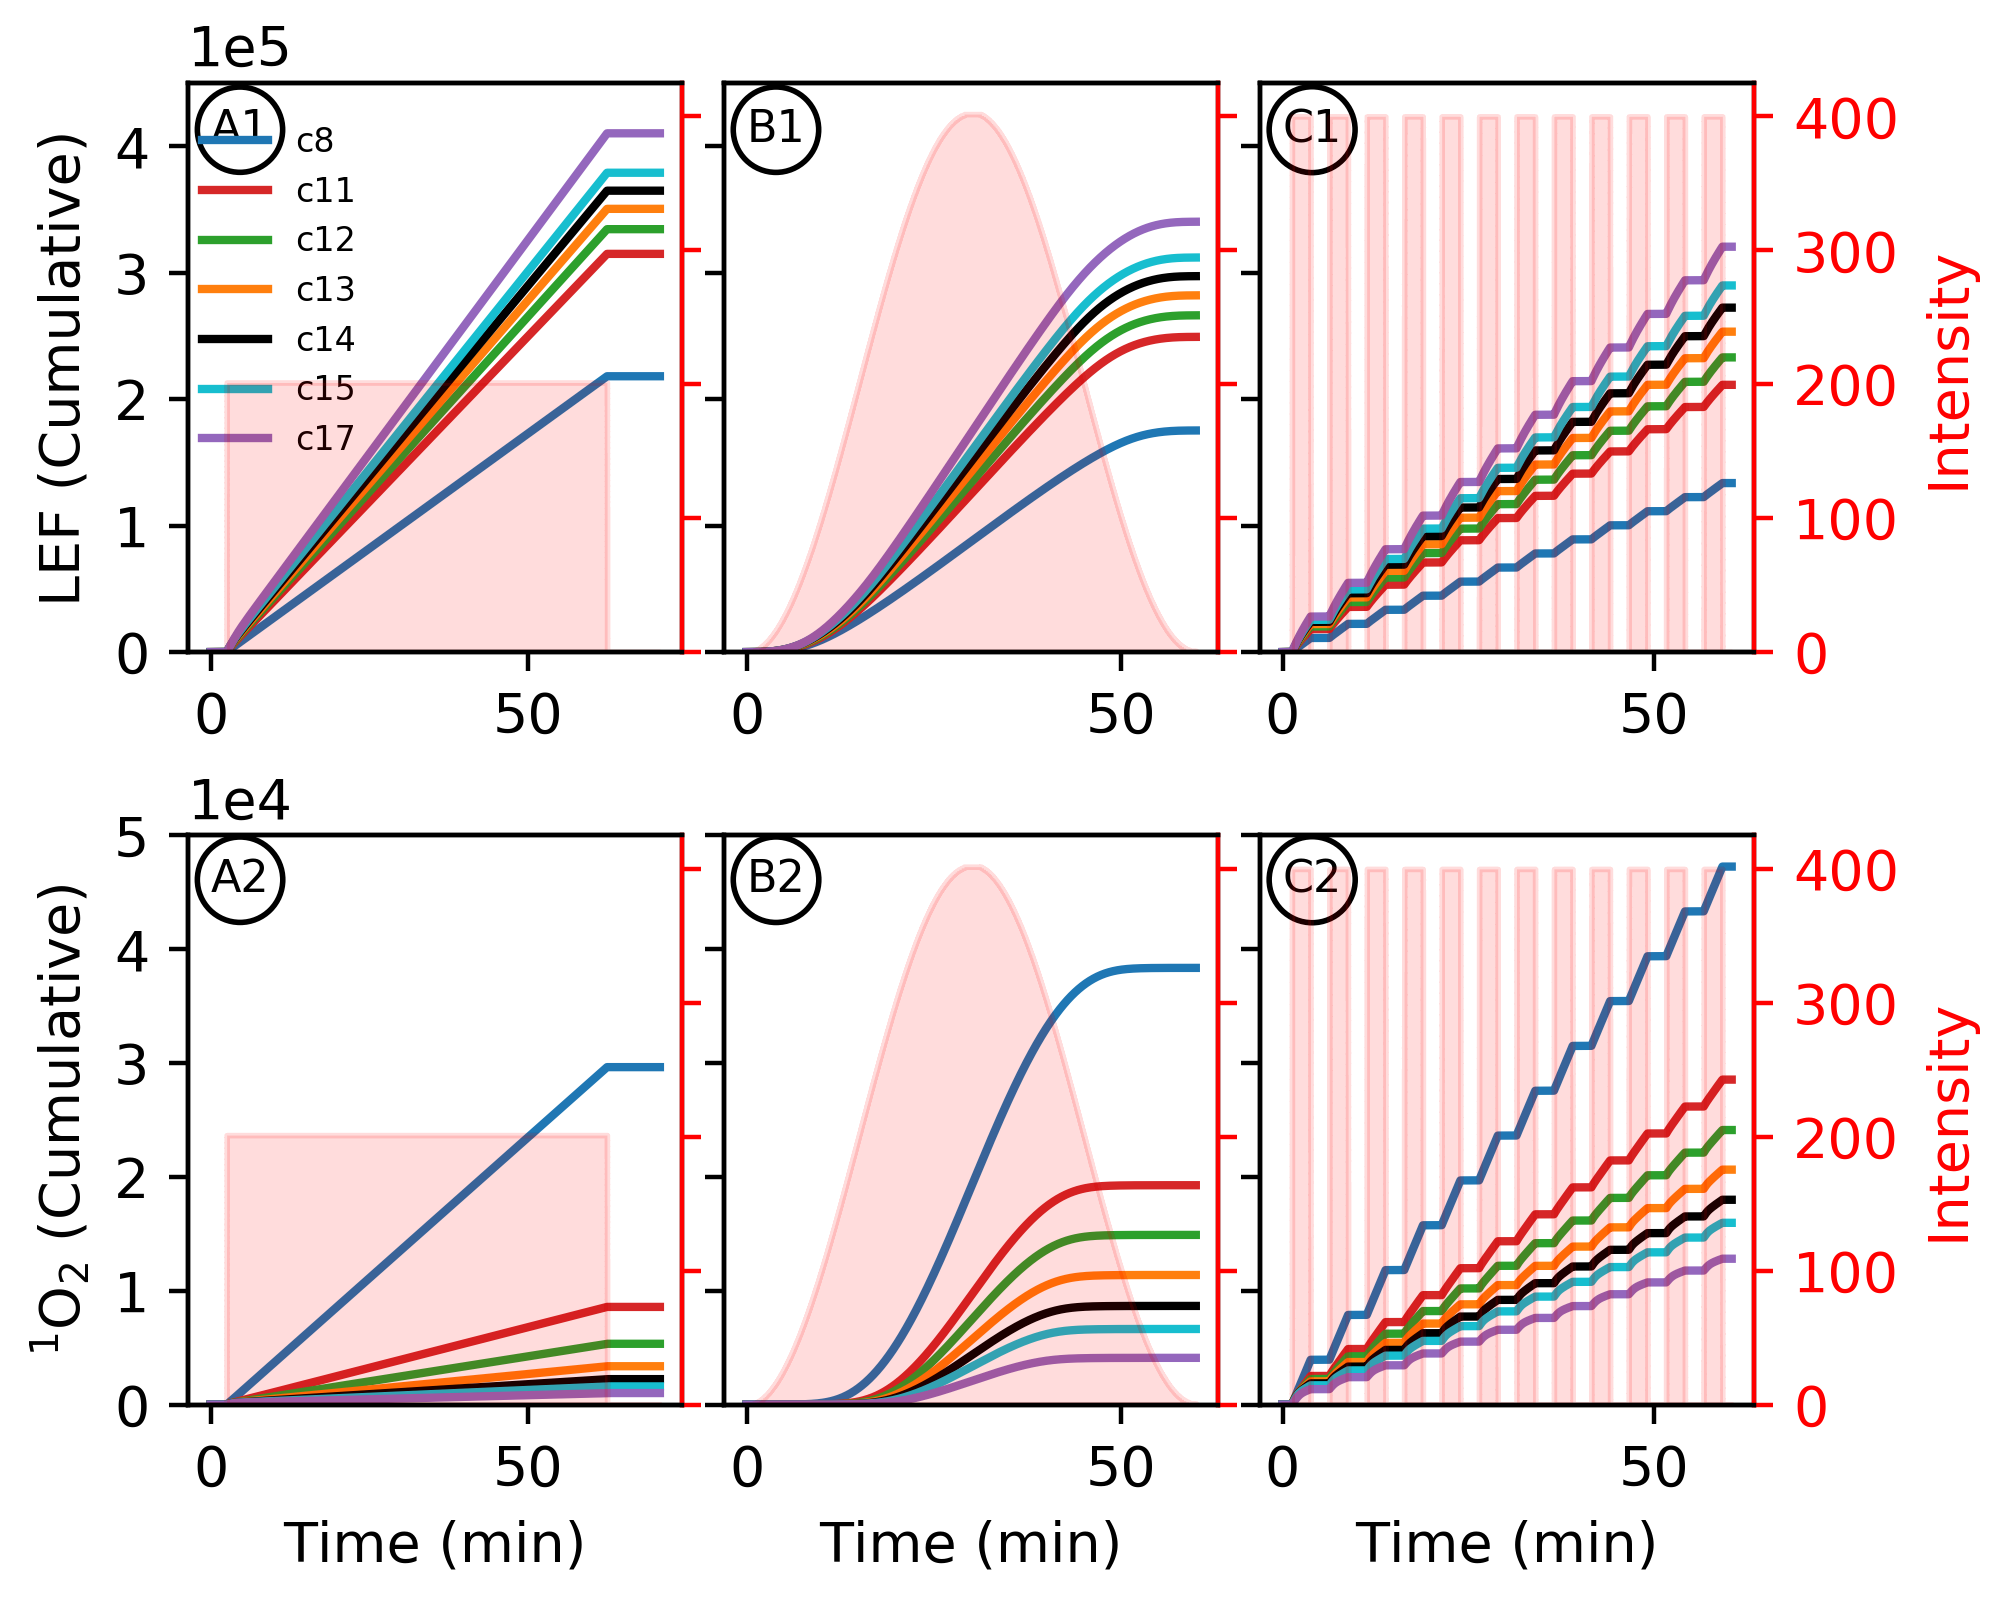

Simulated responses of the light reactions were performed as in figure 3. Variability in environment was simulated with 1-hour light profiles of static light (A1, 2), sinusoidal light (B1, 2), or square wave fluctuating light (C1, 2) to provide the same total illumination during the simulation. (1) The total outputs for linear electron flow (LEF) over the course of the light simulations and (2) 1O2 were integrated over the light treatment to give the cumulative totals. Shaded regions indicate the light profiles for each simulation. 


In [68]:
print('Supplemental Figure 8: Altered pmf composition due to c-subunit stoichiometry limits photosynthetic '
      'productivity.')

fig = plt.figure('Supplemental Figure 8', figsize=(5,4), dpi=200)
ax1 = fig.add_subplot(231)
ax1b = ax1.twinx()
ax2 = fig.add_subplot(232)
ax2b = ax2.twinx()
ax3 = fig.add_subplot(233)
ax3b = ax3.twinx()
ax4 = fig.add_subplot(234)
ax4b = ax4.twinx()
ax5 = fig.add_subplot(235)
ax5b = ax5.twinx()
ax6 = fig.add_subplot(236)
ax6b = ax6.twinx()

for key in output_dict:
    c=key.split('=')[1]
    if "single pulse 201.3umolE subunits" in str(key):
        ax1.plot(output_dict[key]['time_axis']/60,output_dict[key]['LEF_cumulative'], 
                 color=set_of_c_stoichiometries[int(c)], label="c"+str(c))
        ax1b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                          color='red', alpha=0.02,zorder=2)
        ax4.plot(output_dict[key]['time_axis']/60,output_dict[key]['singletO2_array'], 
                 color=set_of_c_stoichiometries[int(c)])
        ax4b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                          color='red', alpha=0.02,zorder=2)
    if "single sin wave 402.71umolE subunits" in str(key):
        ax2.plot(output_dict[key]['time_axis']/60,output_dict[key]['LEF_cumulative'], 
                 color=set_of_c_stoichiometries[int(c)], label=str(c))
        ax2b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                          color='red', alpha=0.02,zorder=2)        
        ax5.plot(output_dict[key]['time_axis']/60,output_dict[key]['singletO2_array'], 
                 color=set_of_c_stoichiometries[int(c)])
        ax5b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                          color='red', alpha=0.02,zorder=2)
    if "square wave 60 min max 400 light subunits" in str(key):
        ax3.plot(output_dict[key]['time_axis']/60,output_dict[key]['LEF_cumulative'], 
                 color=set_of_c_stoichiometries[int(c)])
        ax3b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                          color='red', alpha=0.02,zorder=2)
        ax6.plot(output_dict[key]['time_axis']/60,output_dict[key]['singletO2_array'], 
                 color=set_of_c_stoichiometries[int(c)])
        ax6b.fill_between(output_dict[key]['time_axis']/60, output_dict[key]['light_curve'],0,
                          color='red', alpha=0.02,zorder=2)

        
ax1.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax2.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax3.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax4.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax5.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax6.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

props = dict(boxstyle='circle', facecolor='white')

axes = [ax1,ax2,ax3]
labels = ['A1','B1','C1']
axes_labels = ['LEF (Cumulative)','','']
for i in range(len(axes)):
    subplot = axes[i]
    label = labels[i]
    y_label = axes_labels[i]
    subplot.text(0, 430000, label, fontsize=8,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=0, top=450000)
    subplot.set_ylabel(y_label)
    if i != 0:
        subplot.set_yticklabels([])

axes = [ax4,ax5,ax6]
labels = ['A2','B2','C2']
axes_labels = [r'$^1$O$_2$ (Cumulative)','','']
for i in range(len(axes)):
    subplot = axes[i]
    label = labels[i]
    y_label = axes_labels[i]
    subplot.text(0, 48000, label, fontsize=8,verticalalignment='top', bbox=props)
    subplot.set_ylim(bottom=0, top=50000)
    subplot.set_xlabel('Time (min)')
    subplot.set_ylabel(y_label)
    if i != 0:
        subplot.set_yticklabels([])

axes = [ax1b,ax2b,ax3b,ax4b,ax5b,ax6b]
axes_labels = ['','','Intensity','','','Intensity']
for i in range(len(axes)):
    subplot = axes[i]
    y_label = axes_labels[i]
    subplot.set_ylim(bottom=0, top=425)
    subplot.yaxis.label.set_color('red')
    subplot.spines['right'].set_color('red')
    subplot.tick_params(axis='y', colors='red')
    subplot.set_ylabel(y_label)
    if i not in [2,5]:
        subplot.set_yticklabels([])
        
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=.5)
ax1.legend(bbox_to_anchor=(0.4,0.29),frameon=False, prop={'size':6})
plt.show()
print('Simulated responses of the light reactions were performed as in figure 3. Variability in environment was '
      'simulated with 1-hour light profiles of static light (A1, 2), sinusoidal light (B1, 2), or square wave '
      'fluctuating light (C1, 2) to provide the same total illumination during the simulation. (1) The total '
      'outputs for linear electron flow (LEF) over the course of the light simulations and (2) 1O2 were integrated '
      'over the light treatment to give the cumulative totals. Shaded regions indicate the light profiles for each '
      'simulation. ')